In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Получение признаков полностью аналаогично вызова функции Виктора

In [55]:
!python3 ./pzph1dot1.py --outputDir ./output_test/ \
        --xrayCatalog ../data/3weak.gz_pkl --primaryRadius 1 \
        --baseCatalog ps \
        --njobs 24 \
        --xrayRaCol ra --xrayDecCol dec \
        --modelsSeries x1 --modelsIds 18 19 20 21 22 35 \
        --chunkSize 100000

Namespace(assembledDataset=None, baseCatalog='ps', baseDecCol='decBest', baseRaCol='raBest', chunkSize=100000, coldStart=False, customModels=None, dm=0.0, featuresTransformModule=None, featuresTransformName=None, getaroundrPath='/home/horungev/Catalogs/SRG/crossmatch/getaroundr.py', keepModelsInMemory=False, ls=None, lsOn=None, modelsIds=[18, 19, 20, 21, 22, 35], modelsSeries='x1', njobs=24, outputDir='./output_test/', predictOn=None, primaryRadius=1.0, ps=None, psEdition='ps2fluxbest', psFluxesManually=False, psFluxesPath=None, psOn=None, sdss=None, sdssOn=None, secondaryRadius=1.0, useWiseForced=False, xrayCatalog='../data/3weak.gz_pkl', xrayDecCol='dec', xrayHealpixId=None, xrayRaCol='ra')
[('part-00000', 'xray')]
[]
100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 11554.56it/s]
kwargs in predict ['./output_test/buf/part-00000.features.gz_pkl'] [18, 19, 20, 21, 22, 35] None False False 24 <function main.<locals>.<lambda> at 0x7fd16a2cb950>
===== Not found PZPH1_DAT

Если хочется запустить этапы отдельно:

In [4]:
from pzph1dot1 import *

/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/process_counterparts.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Путь есть таблица, которую хотим аугментировать:

In [3]:
import pandas as pd

In [39]:
df = pd.read_pickle('../data/3weak.pkl_gz', compression='gzip')
df

,nrow,objID,ra,dec,zspec,zspec_conf,zspec_source,class,subclass,class1,...,zoo_best-x1_ci1a_90_Lx_err,zoo_best-x1_ci1b_90_Lx_err,zoo_best-x1_ci1a_95,zoo_best-x1_ci1b_95,zoo_best-x1_ci1a_95_DL_cm,zoo_best-x1_ci1b_95_DL_cm,zoo_best-x1_ci1a_95_Lx,zoo_best-x1_ci1b_95_Lx,zoo_best-x1_ci1a_95_Lx_err,zoo_best-x1_ci1b_95_Lx_err
9328,198482,131932190057259165,219.005907,19.948889,0.045404,-999.0,SDSS,1,STARFORMING,,...,NaN,NaN,-5.822927,0.364719,NaN,NaN,NaN,NaN,NaN,NaN
9479,368943,119241304119489055,130.411915,9.373807,0.000239,-999.0,SDSS,1,N/A,,...,NaN,NaN,-3.251049,0.344858,NaN,NaN,NaN,NaN,NaN,NaN
9681,610236,131851704557834825,170.455790,19.878579,-0.009112,-999.0,SDSS,1,N/A,,...,NaN,NaN,-3.134196,0.553093,NaN,NaN,NaN,NaN,NaN,NaN
9755,692755,113791676021961937,167.602380,4.826100,0.030167,-999.0,SDSS,1,STARFORMING,,...,NaN,NaN,-3.250823,0.332563,NaN,NaN,NaN,NaN,NaN,NaN
24242,52943,172432048282463503,204.828265,53.694016,0.106581,-999.0,SDSS,1,STARFORMING,,...,NaN,NaN,-3.212785,0.486123,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60318,960263,1237678617420628015,6.372177,1.363077,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-2.730689,1.53531,NaN,NaN,NaN,NaN,NaN,NaN
60340,960285,1237657628450750810,167.748040,50.564964,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-2.96547,0.383744,NaN,NaN,NaN,NaN,NaN,NaN
60362,960307,1237665583253881608,251.800550,50.801796,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.679388,0.211186,NaN,NaN,NaN,NaN,NaN,NaN
60381,960326,1237679579471282689,22.535753,30.106945,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-3.302376,0.350595,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
catalog = Catalog('../data/3weak.gz_pkl', ('ra', 'dec'),
                  njobs=24, output_dir='./output_augm',
                  filename='augmentation')

('raBest', 'decBest')
===== Defined use case: 1 =====


In [13]:
!ls ./output_augm/

__buf__


In [14]:
!ls ./output_augm/__buf__

augmentation.gaiaedr3_fluxes.fits
augmentation.gaiaedr3_fluxes.stderr.20220214062607.txt
augmentation.gaiaedr3_fluxes.stdout.20220214062607.txt
augmentation.ls_fluxes.fits
augmentation.ls_fluxes.stderr.20220213233215.txt
augmentation.ls_fluxes.stdout.20220213233215.txt
augmentation.ps_fluxes.fits
augmentation.ps_fluxes.stderr.20220213164136.txt
augmentation.ps_fluxes.stdout.20220213164136.txt
augmentation.sdss_fluxes.fits
augmentation.sdss_fluxes.stderr.20220213190516.txt
augmentation.sdss_fluxes.stdout.20220213190516.txt
cross-match_base_catalog_coords.fits
cross-match_x-ray_coords.fits


Необходимо произвести первичную обработку данных - получить необходимые признаки из всех каталогов в одинаковых измерениях

In [ ]:
catalog.prepare_data()

Use_case = 1
===== Correlate with sdss =====
===== Done =====
===== Correlate with ls =====
===== Done =====
===== Correlate with gaiaedr3 =====
===== Done =====
===== DEBUG =====
= augmentation
===== END DEBUG =====
===== DEBUG =====
= ra_target -- raBest has shape (151494,)
= dec_target -- decBest has shape (151494,)
===== END DEBUG =====


Process Counterparts:   0%|          | 0/71073 [00:00<?, ?it/s]

{'sdss': '__workcid___input', 'ps': 'ps___workcid__', 'ls': '__workcid___input', 'gaiaedr3': '__workcid___input'}


Process Counterparts:   0%|          | 0/150747 [00:00<?, ?it/s]

Process Counterparts:   0%|          | 0/151011 [00:00<?, ?it/s]

Exception in thread Thread-22:
Traceback (most recent call last):
  File "/home/nmalysheva/.conda/envs/nadya/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/home/nmalysheva/.conda/envs/nadya/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/home/nmalysheva/.conda/envs/nadya/lib/python3.7/multiprocessing/pool.py", line 412, in _handle_workers
    pool._maintain_pool()
  File "/home/nmalysheva/.conda/envs/nadya/lib/python3.7/multiprocessing/pool.py", line 248, in _maintain_pool
    self._repopulate_pool()
  File "/home/nmalysheva/.conda/envs/nadya/lib/python3.7/multiprocessing/pool.py", line 241, in _repopulate_pool
    w.start()
  File "/home/nmalysheva/.conda/envs/nadya/lib/python3.7/multiprocessing/process.py", line 112, in start
    self._popen = self._Popen(self)
  File "/home/nmalysheva/.conda/envs/nadya/lib/python3.7/multiprocessing/context.py", line 277, in _Popen
    return Popen(process_obj)
 

In [16]:
catalog.photo_data_paths

{'sdss': './output_augm/__buf__/augmentation.sdss_fluxes.fits',
 'ps': './output_augm/__buf__/augmentation.ps_fluxes.fits',
 'ls': './output_augm/__buf__/augmentation.ls_fluxes.fits',
 'gaiaedr3': './output_augm/__buf__/augmentation.gaiaedr3_fluxes.fits'}

In [17]:
!ls ./output_augm/

augmentation.features.gz_pkl  __buf__


Что получили:

In [18]:
df_after_transform = pd.read_pickle('./output_augm/augmentation.features.gz_pkl', compression='gzip')
df_after_transform

,ra,dec,nrow,objID,__workxid__,ps_sep_input,ps_objID,ps_raBest,ps_decBest,ps_raStack,...,phot_is_train_star,phot_is_train_gal,phot_is_test_xxln_m16,phot_is_test_s82x_l19,phot_is_test_s82x_a17,phot_is_test_qso,phot_is_test_star,phot_is_test_gal,phot_is_spec_sdss,phot_test_field
0,219.005907,19.948889,198482,131932190057259165,0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,-
1,130.411915,9.373807,368943,119241304119489055,1,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,-
2,170.455790,19.878579,610236,131851704557834825,2,0.052266,131851704557834825,170.455785,19.878565,171.799337,...,False,False,False,False,False,False,False,False,False,-
3,167.602380,4.826100,692755,113791676021961937,3,0.820555,113791676021961937,167.602196,4.826236,166.850227,...,False,False,False,False,False,False,False,False,False,-
4,204.828265,53.694016,52943,172432048282463503,4,0.099468,172432048282463503,204.828221,53.694026,204.828221,...,False,False,False,False,False,False,False,False,False,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84124,6.372177,1.363077,960263,1237678617420628015,84093,0.119310,109630063721716185,6.372177,1.363110,5.521615,...,False,False,False,False,False,False,False,False,False,S82X
84125,167.748040,50.564964,960285,1237657628450750810,84094,0.256413,168671677481188566,167.748075,50.564896,167.748078,...,False,False,False,False,False,False,False,False,False,-
84126,251.800550,50.801796,960307,1237665583253881608,84095,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,-
84127,22.535753,30.106945,960326,1237679579471282689,84096,0.084500,144120225357308887,22.535726,30.106945,22.667167,...,False,False,False,False,False,False,False,False,False,-


In [9]:
# Мы его потеряем, поэтому заранее созраним в отдельном месте
# df_after_transform = df_after_transform.merge(df[['ra', 'dec', 'nrow', 'objID', 'class']], how='left', on=['ra', 'dec', 'nrow', 'objID'])
# df_after_transform.to_pickle('./output_augm/after_transform.features.gz_pkl', compression='gzip')
df_after_transform = pd.read_pickle('./output_augm/after_transform.features.gz_pkl', compression='gzip')
df_after_transform

,ra,dec,nrow,objID,__workxid__,ps_sep_input,ps_objID,ps_raBest,ps_decBest,ps_raStack,...,phot_is_train_star,phot_is_train_gal,phot_is_test_xxln_m16,phot_is_test_s82x_l19,phot_is_test_s82x_a17,phot_is_test_qso,phot_is_test_star,phot_is_test_gal,phot_is_spec_sdss,phot_test_field
0,219.005907,19.948889,198482,131932190057259165,0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,-
1,130.411915,9.373807,368943,119241304119489055,1,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,-
2,170.455790,19.878579,610236,131851704557834825,2,0.052266,131851704557834825,170.455785,19.878565,171.799337,...,False,False,False,False,False,False,False,False,False,-
3,167.602380,4.826100,692755,113791676021961937,3,0.820555,113791676021961937,167.602196,4.826236,166.850227,...,False,False,False,False,False,False,False,False,False,-
4,204.828265,53.694016,52943,172432048282463503,4,0.099468,172432048282463503,204.828221,53.694026,204.828221,...,False,False,False,False,False,False,False,False,False,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84124,6.372177,1.363077,960263,1237678617420628015,84093,0.119310,109630063721716185,6.372177,1.363110,5.521615,...,False,False,False,False,False,False,False,False,False,S82X
84125,167.748040,50.564964,960285,1237657628450750810,84094,0.256413,168671677481188566,167.748075,50.564896,167.748078,...,False,False,False,False,False,False,False,False,False,-
84126,251.800550,50.801796,960307,1237665583253881608,84095,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,-
84127,22.535753,30.106945,960326,1237679579471282689,84096,0.084500,144120225357308887,22.535726,30.106945,22.667167,...,False,False,False,False,False,False,False,False,False,-


Используем аугментацию

In [12]:
# catalog.assembled_dataset_path = './output_augm/augmentation.features.gz_pkl'

===== False =====
DM for sdss_psfFlux_u = 1
sdss_psfFluxIvar_u ivar
asinhmag_dm


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1883: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors[errors <= 0] = np.nan
/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


read model knn
AugmType.KNN
Hi! I'm neighbors of [      nan       nan 7.281695  ...       nan 3.5040014 1.172788 ]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.         0.         0.31871834 ... 0.         0.22153058 0.21069826]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for sdss_psfFlux_g = 1
sdss_psfFluxIvar_g ivar
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [      nan       nan 36.140907 ...       nan 12.981437  9.90736 ]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.         0.         0.93918723 ... 0.         0.2426794  0.24122808]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for sdss_psfFlux_r = 1
sdss_psfFluxIvar_r ivar
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [      nan       nan 70.16393  ...       nan 22.388012 19.770273]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.         0.         1.21488531 ... 0.         0.40331538 0.29803975]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for sdss_psfFlux_i = 1
sdss_psfFluxIvar_i ivar
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [      nan       nan 89.21733  ...       nan 26.104166 24.940598]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.         0.         2.58593112 ... 0.         0.42079627 0.45324767]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for sdss_psfFlux_z = 1
sdss_psfFluxIvar_z ivar
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [       nan        nan 104.180664 ...        nan  30.50601   31.51267 ]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.         0.         2.2105095  ... 0.         0.91378617 1.08494195]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for sdss_cModelFlux_u = 1
sdss_cModelFluxIvar_u ivar
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [      nan       nan 7.6181912 ...       nan 3.605211  0.7462404]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.         0.         0.29430079 ... 0.         1.83990284 0.31273083]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for sdss_cModelFlux_g = 1
sdss_cModelFluxIvar_g ivar
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [      nan       nan 36.129913 ...       nan 13.780596 10.030334]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.         0.         0.26514856 ... 0.         0.2099001  0.15263931]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1391: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(nrows = 1, ncols=1, figsize=(12, 8), sharex=True, sharey = True)
/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for sdss_cModelFlux_r = 1
sdss_cModelFluxIvar_r ivar
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [      nan       nan 70.549034 ...       nan 22.550503 19.926868]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.         0.         0.41276832 ... 0.         0.2689522  0.38284883]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for sdss_cModelFlux_i = 1
sdss_cModelFluxIvar_i ivar
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [      nan       nan 89.30449  ...       nan 26.271107 25.676474]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.         0.         0.61081407 ... 0.         0.32068126 0.34409682]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for sdss_cModelFlux_z = 1
sdss_cModelFluxIvar_z ivar
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [       nan        nan 106.739716 ...        nan  36.62836   35.311428]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.         0.         1.57484324 ... 0.         6.83943723 1.00825933]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))
/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1914: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors[errors <= 0] = np.nan
/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


DM for ps_gKronFlux = 1
ps_gKronFluxErr err
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [        nan         nan 36.95351888 ...         nan 11.70188081
 10.375596  ]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.00000000e+00 0.00000000e+00 5.29368981e-06 ... 0.00000000e+00
 1.08765998e-05 5.29368981e-06]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for ps_rKronFlux = 1
ps_rKronFluxErr err
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [        nan         nan 65.47442441 ...         nan 17.40388399
 17.96092491]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.00000000e+00 0.00000000e+00 7.81716972e-06 ... 0.00000000e+00
 9.42154020e-06 1.02639997e-05]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for ps_iKronFlux = 1
ps_iKronFluxErr err
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [        nan         nan 81.20101401 ...         nan 26.26055502
 23.47014914]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.00000000e+00 0.00000000e+00 1.07943000e-04 ... 0.00000000e+00
 2.16574008e-05 9.19821978e-05]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for ps_zKronFlux = 1
ps_zKronFluxErr err
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [        nan         nan 89.61142417 ...         nan 26.65832242
 23.20487666]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.00000000e+00 0.00000000e+00 8.39654967e-05 ... 0.00000000e+00
 7.20680982e-05 7.20680982e-05]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for ps_yKronFlux = 1
ps_yKronFluxErr err
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [        nan         nan 82.64182462 ...         nan 24.2828171
 29.93771861]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.00000000e+00 0.00000000e+00 1.73428998e-04 ... 0.00000000e+00
 3.03518991e-05 3.03518991e-05]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for ps_gPSFFlux = 1
ps_gPSFFluxErr err
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [        nan         nan 40.19240268 ...         nan 13.43883463
 11.17695857]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.00000000e+00 0.00000000e+00 7.17642979e-05 ... 0.00000000e+00
 1.02849997e-04 8.83631001e-05]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for ps_rPSFFlux = 1
ps_rPSFFluxErr err
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [        nan         nan 73.71876733 ...         nan 22.6347253
 21.55900568]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.00000000e+00 0.00000000e+00 1.43416997e-04 ... 0.00000000e+00
 1.01136004e-06 1.01136004e-06]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for ps_iPSFFlux = 1
ps_iPSFFluxErr err
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [        nan         nan 89.22989655 ...         nan 27.82651163
 26.470746  ]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.00000000e+00 0.00000000e+00 1.60982003e-04 ... 0.00000000e+00
 9.60131001e-05 3.48395006e-05]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for ps_zPSFFlux = 1
ps_zPSFFluxErr err
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [         nan          nan 101.94541104 ...          nan  27.44754554
  27.9477712 ]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.         0.         0.00019877 ... 0.         0.00019877 0.00020733]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for ps_yPSFFlux = 1
ps_yPSFFluxErr err
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [         nan          nan 104.53568022 ...          nan  27.77927116
  28.61053095]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.         0.         0.00018706 ... 0.         0.00146984 0.00022836]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for ls_flux_g_ebv = 1
ls_flux_ivar_g ivar
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [        nan         nan 41.99508864 ...         nan 17.11649753
 10.47215073]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.         0.         0.06860976 ... 0.         0.07909889 0.02959858]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for ls_flux_r_ebv = 1
ls_flux_ivar_r ivar
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [        nan         nan 79.17717677 ...         nan 27.75944775
 21.62033441]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.         0.         0.17031227 ... 0.         0.14759945 0.08589098]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for ls_flux_z_ebv = 1
ls_flux_ivar_z ivar
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [         nan          nan 105.96426794 ...          nan  32.82648133
  30.23454855]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.         0.         0.09652979 ... 0.         0.16137532 0.13371013]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for ls_flux_w1_ebv = 1
ls_flux_ivar_w1 ivar
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [        nan         nan 36.02996443 ...         nan 26.23699797
 13.39833663]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.         0.         0.51761176 ... 0.         0.6103008  0.64236353]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for ls_flux_w2_ebv = 1
ls_flux_ivar_w2 ivar
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [        nan         nan 20.3478094  ...         nan 18.51391666
  9.56938165]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [0.         0.         1.43521521 ... 0.         1.26921242 1.10741445]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for ls_flux_w3_ebv = 1
ls_flux_ivar_w3 ivar
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [         nan          nan 237.5541584  ...          nan -97.83681899
   9.9161346 ]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [ 0.          0.         21.77300741 ...  0.         37.72297235
 22.49006923]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


DM for ls_flux_w4_ebv = 1
ls_flux_ivar_w4 ivar
asinhmag_dm
read model knn
AugmType.KNN
Hi! I'm neighbors of [           nan            nan -1183.81126315 ...            nan
   600.69133152   -32.45181218]
res [0. 0. 0. ... 0. 0. 0.]
knn
res [  0.           0.         313.13278815 ...   0.         316.3804707
 305.25715158]


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/pzph1dot1.py:1442: RuntimeWarning: divide by zero encountered in log
  return (np.arcsinh(f / (2 * b)) + np.log(b)) * (-2.5 / np.log(10))


0              NaN
1              NaN
2        18.586302
3              NaN
4        19.732423
           ...    
84124    14.345854
84125    20.687998
84126          NaN
84127    18.881263
84128    19.687529
Name: decals8tr_Lw1, Length: 84129, dtype: float64


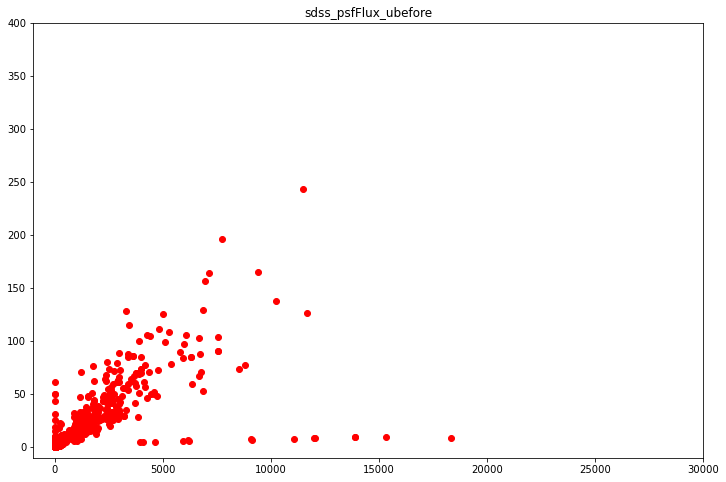

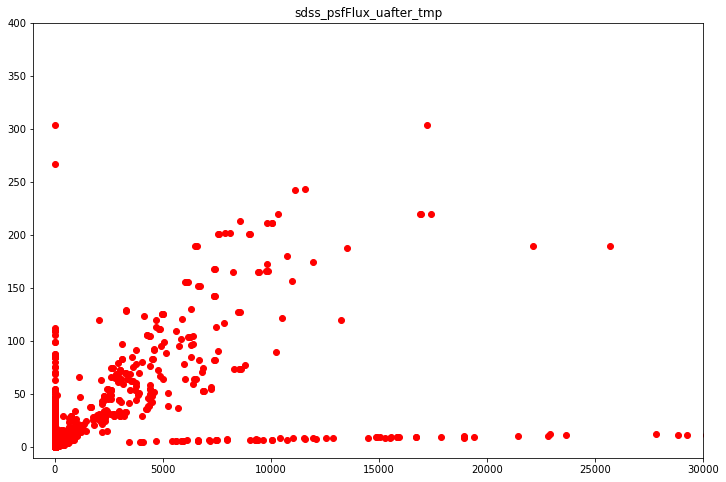

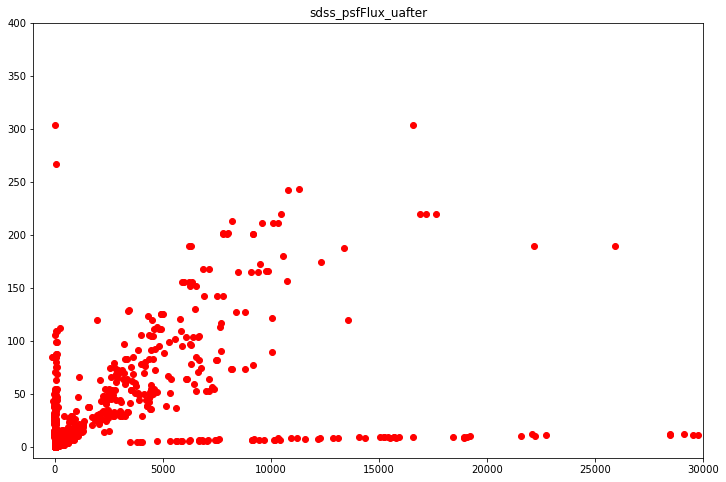

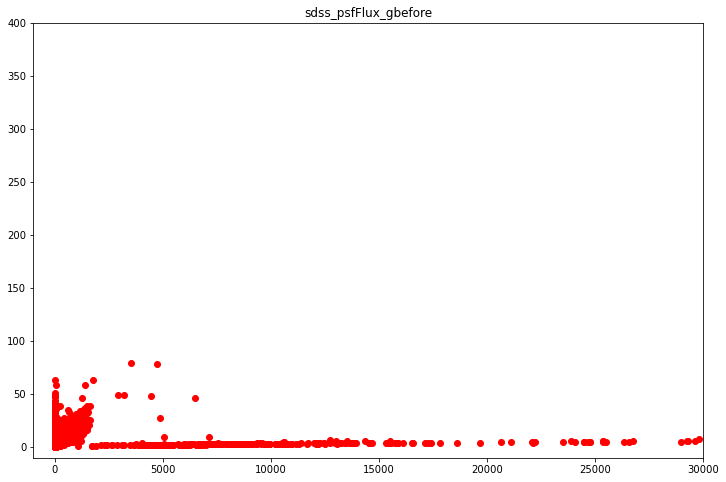

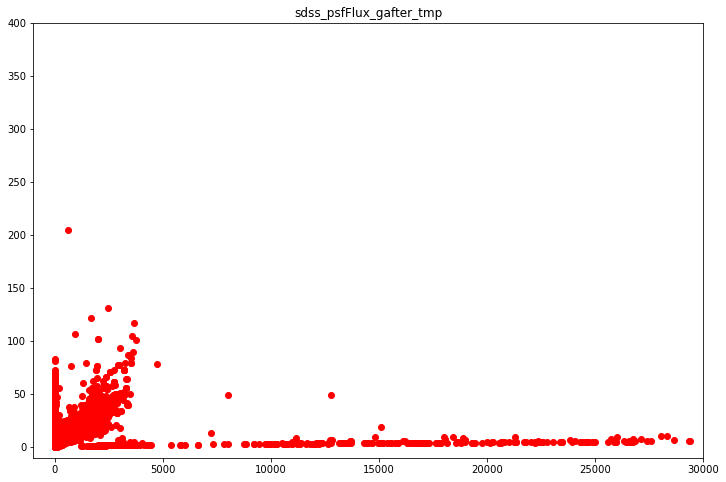

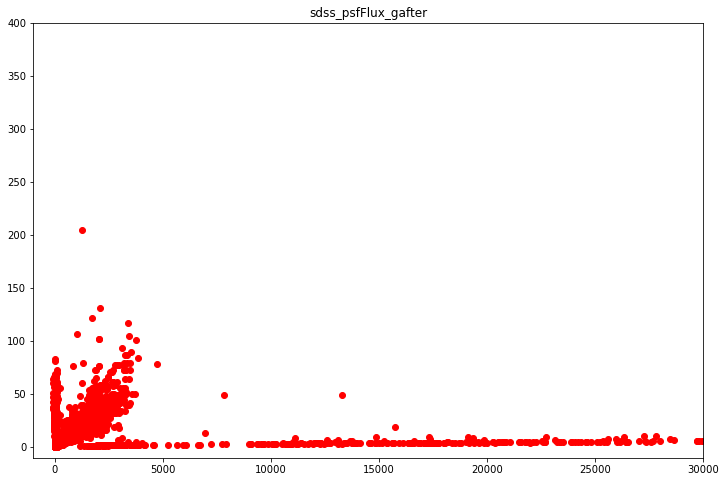

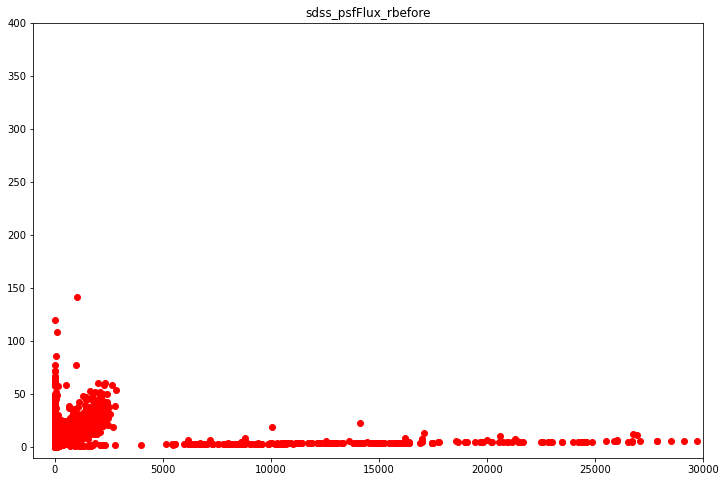

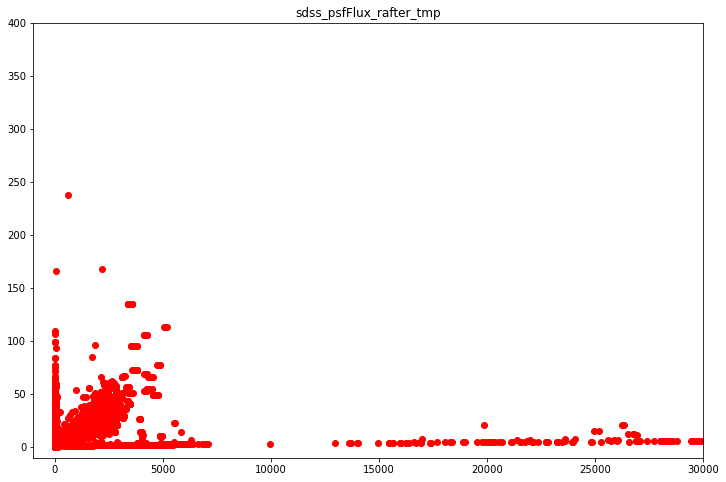

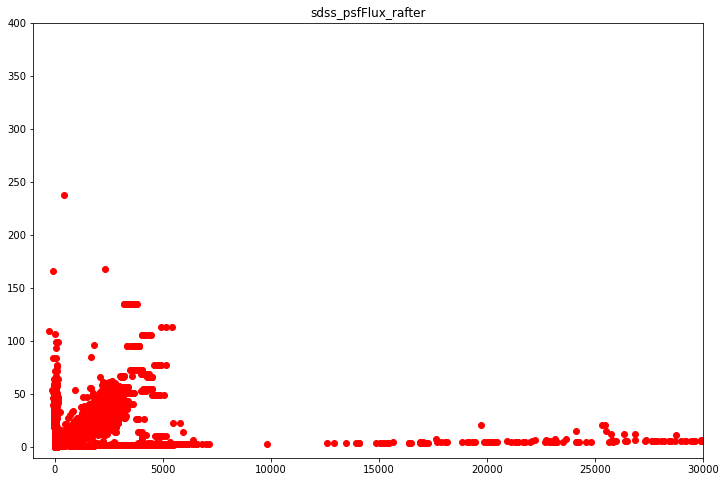

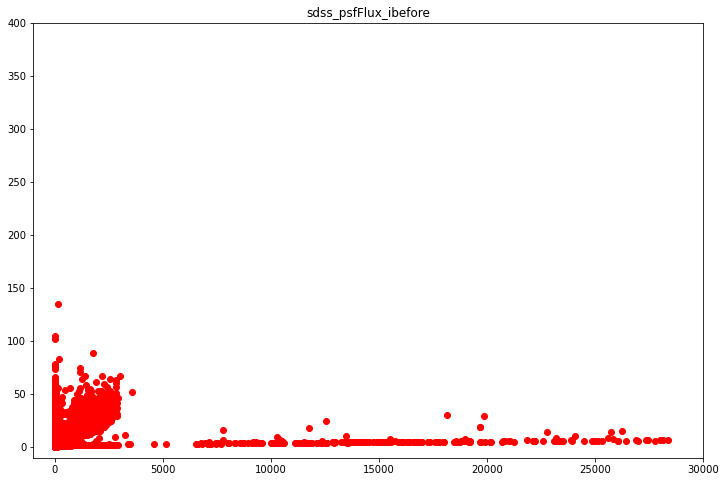

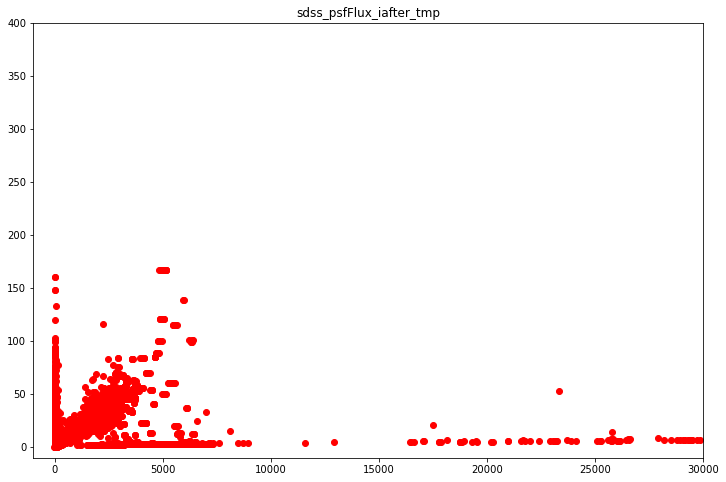

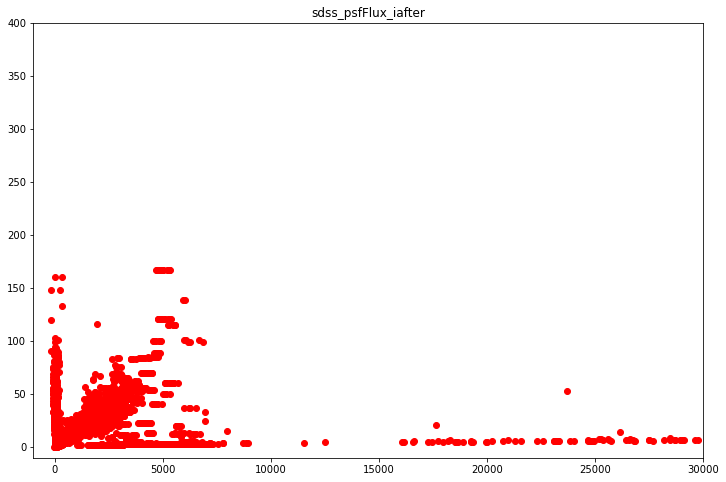

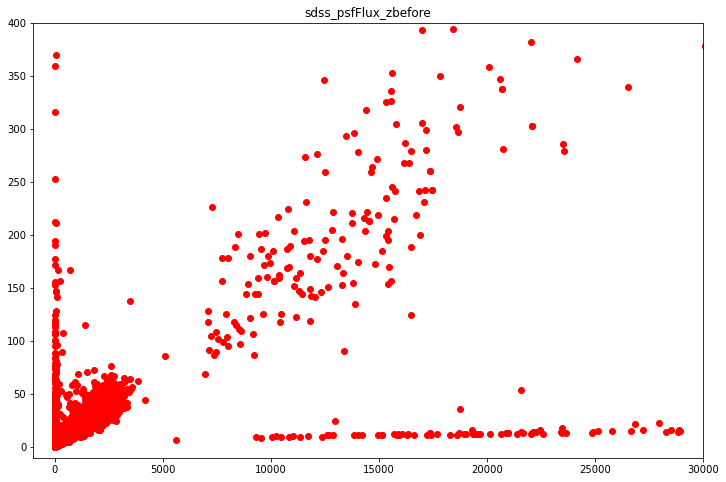

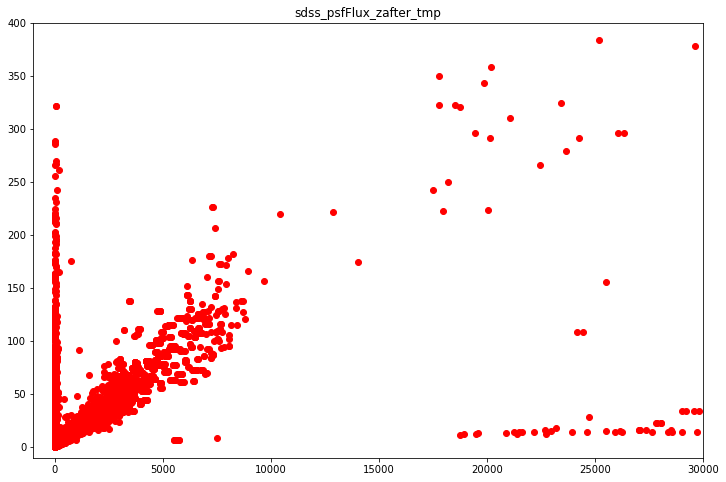

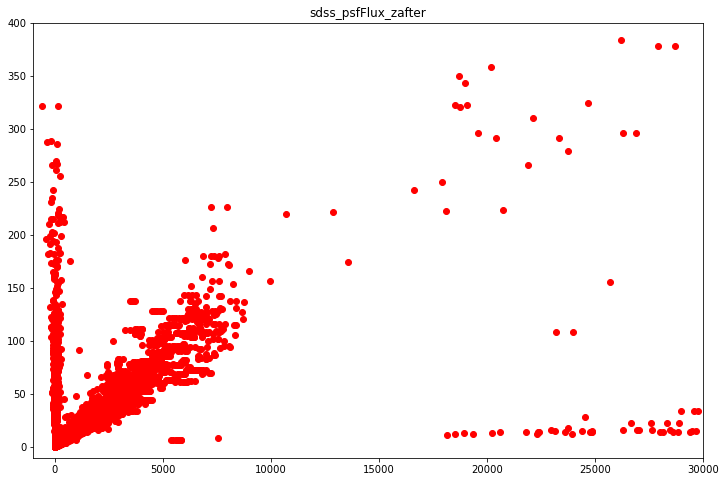

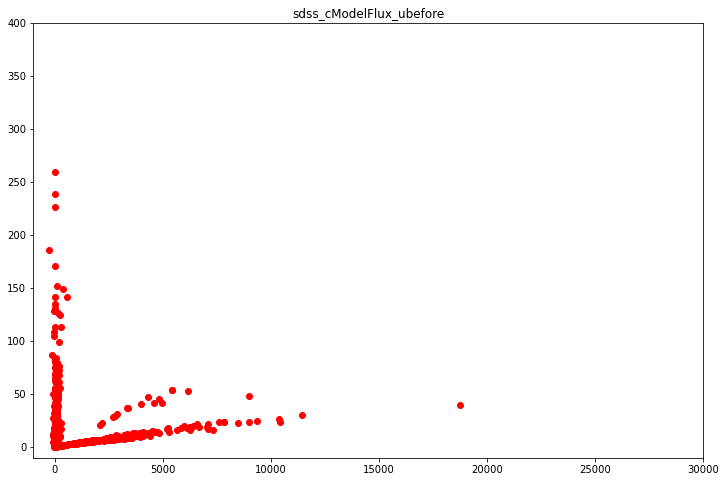

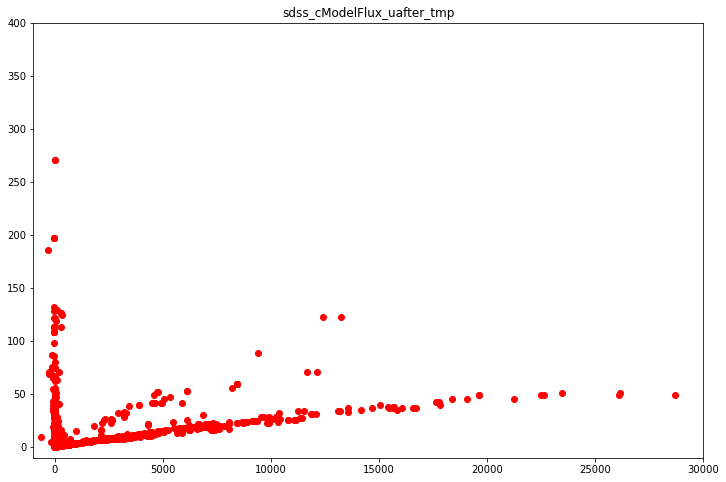

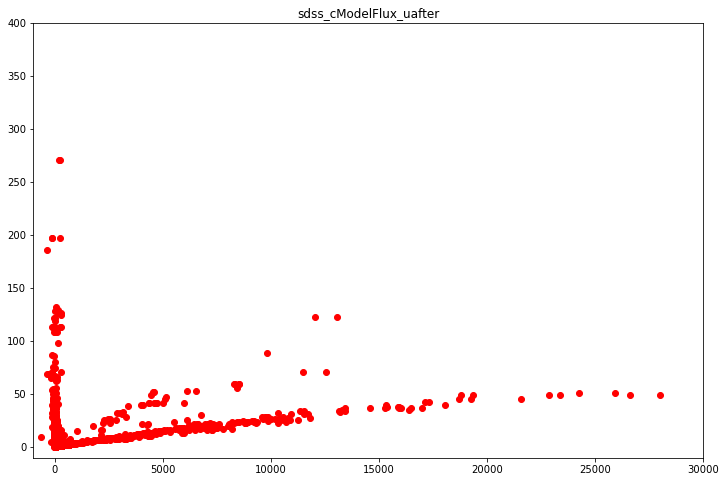

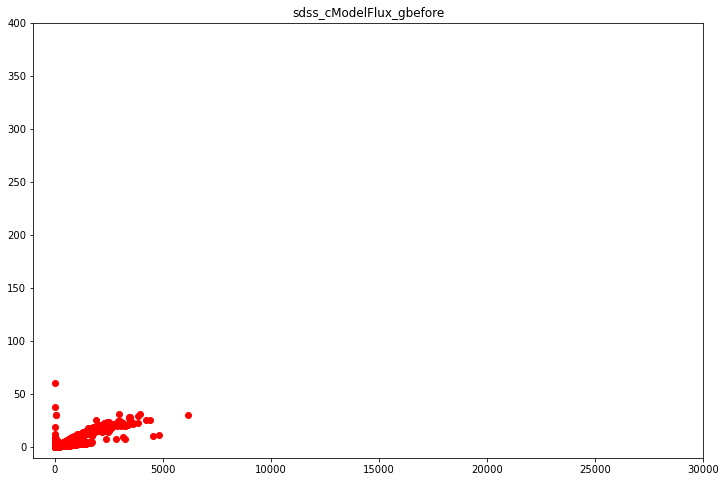

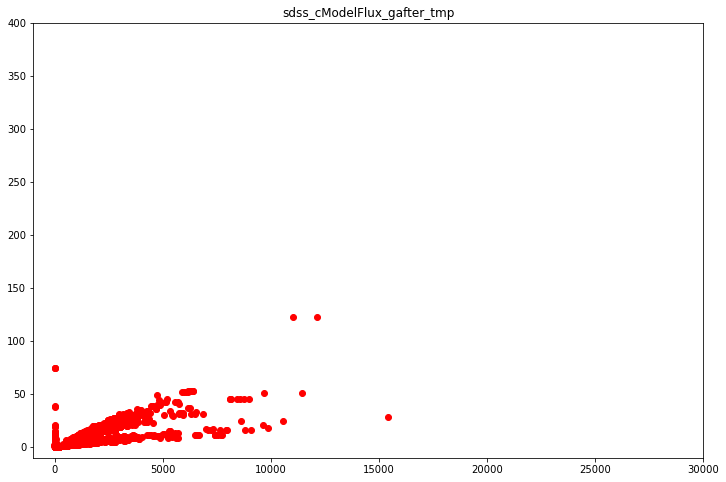

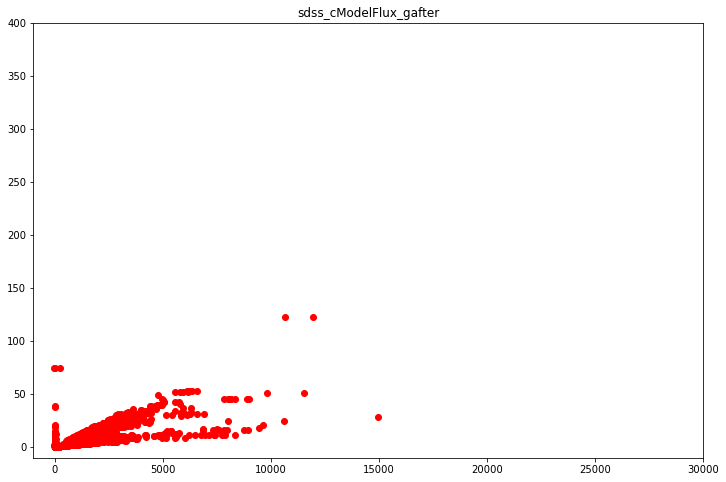

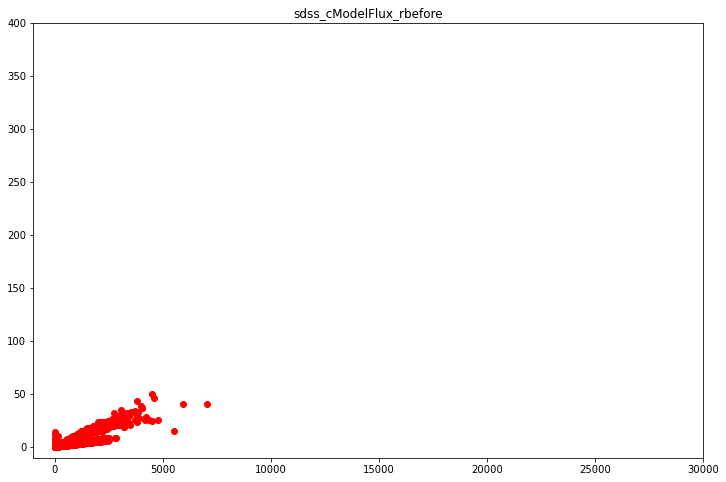

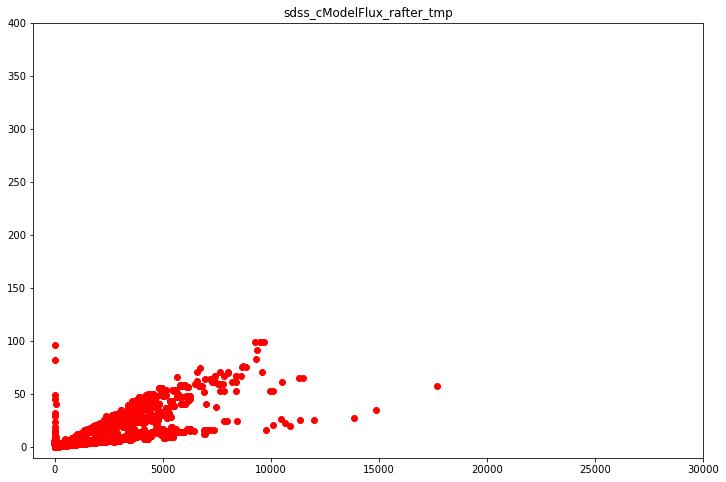

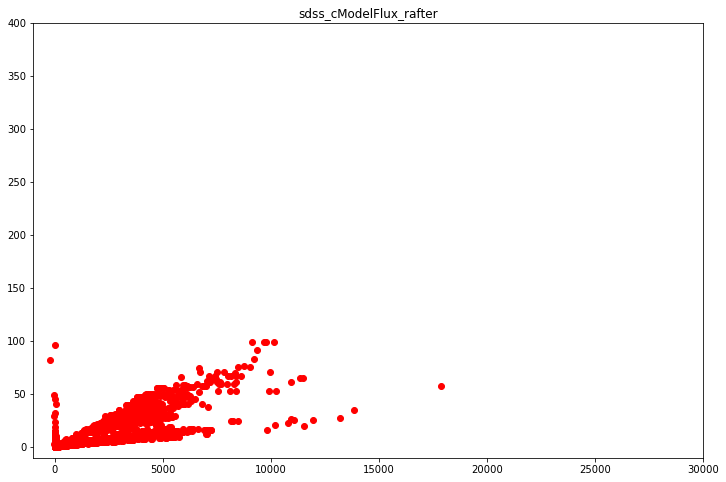

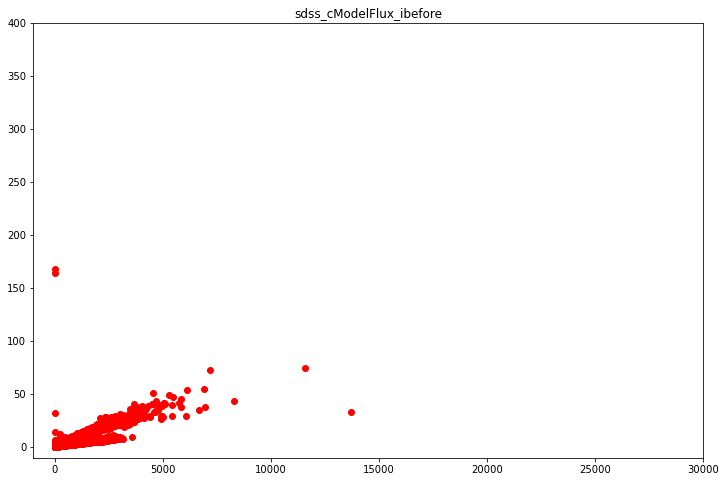

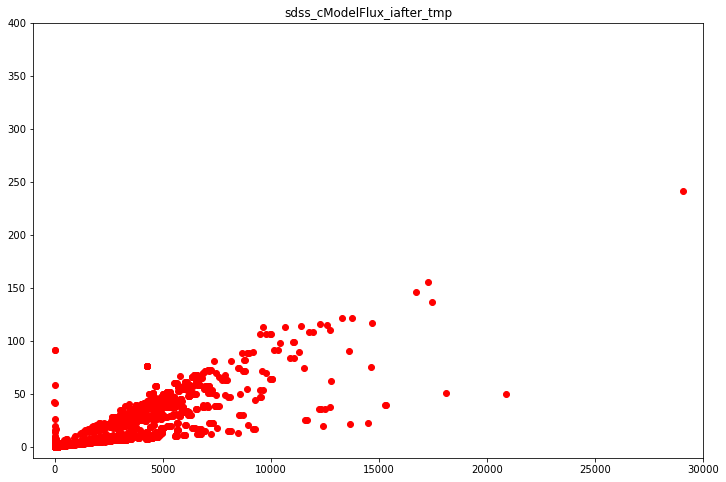

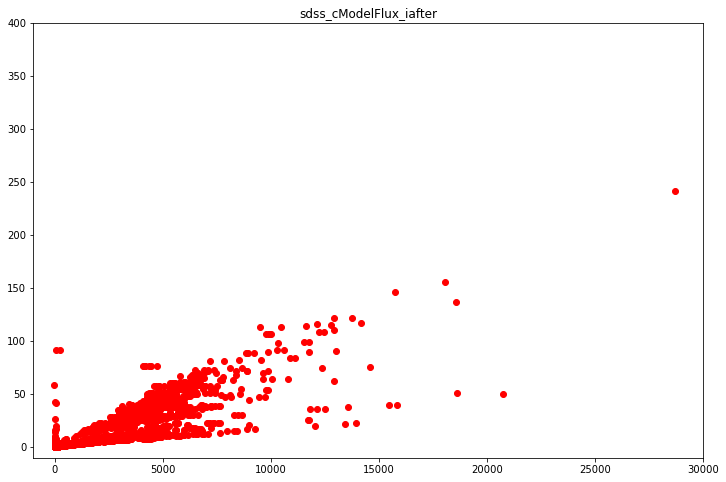

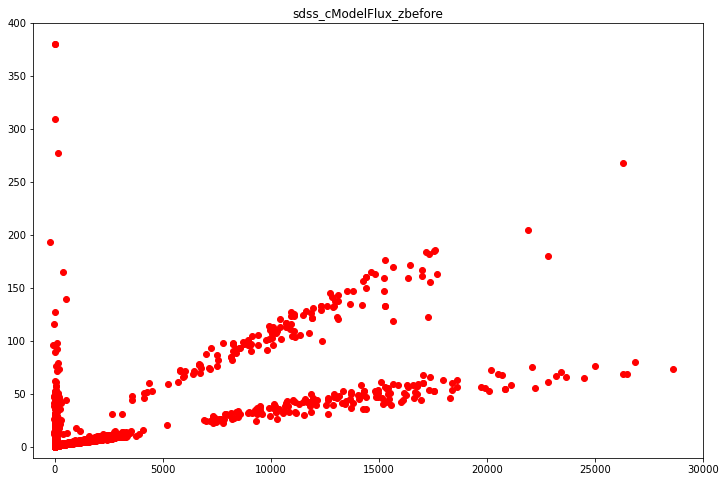

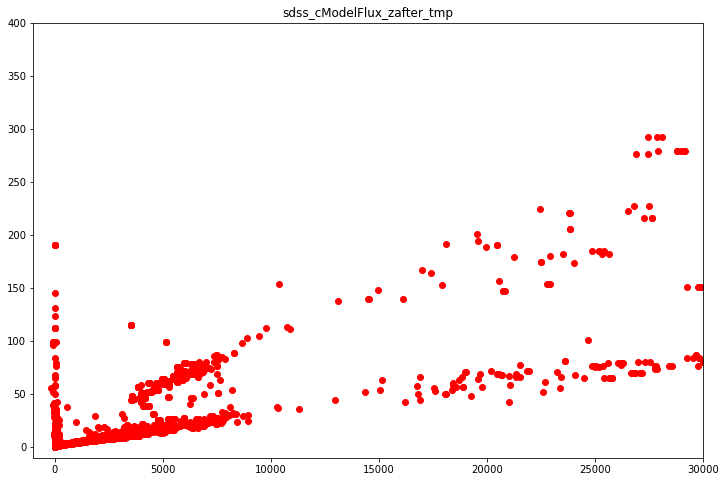

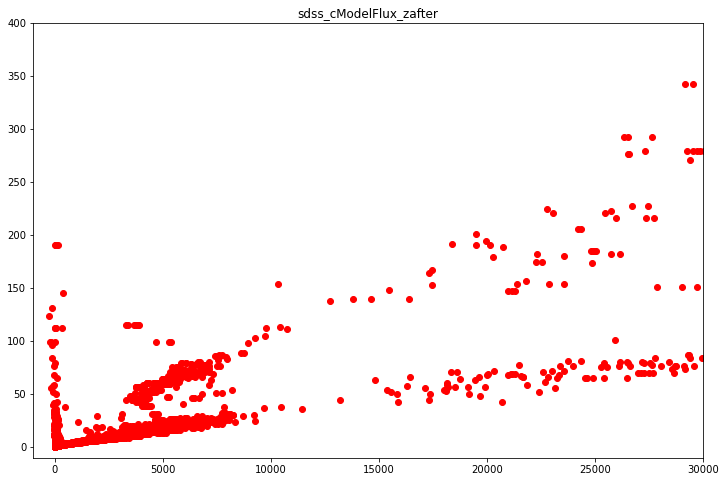

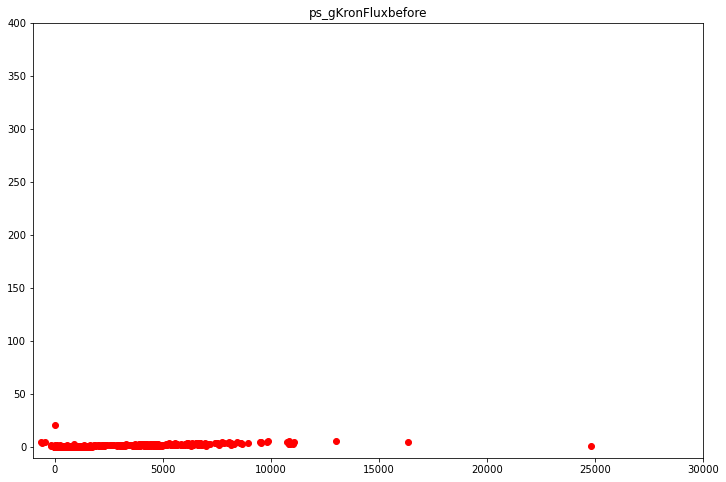

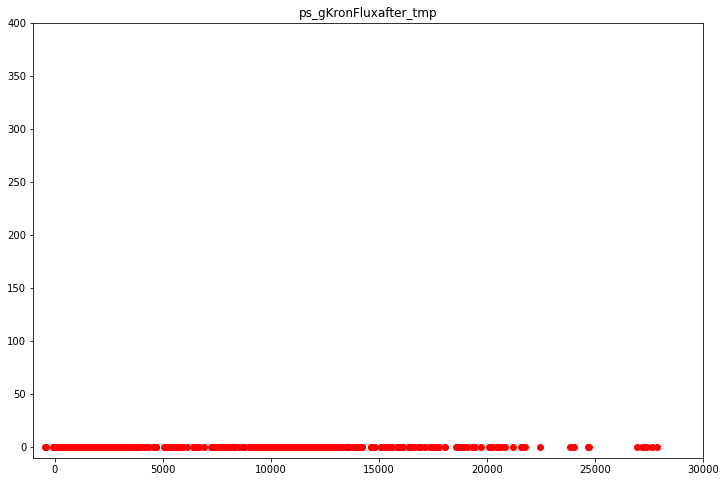

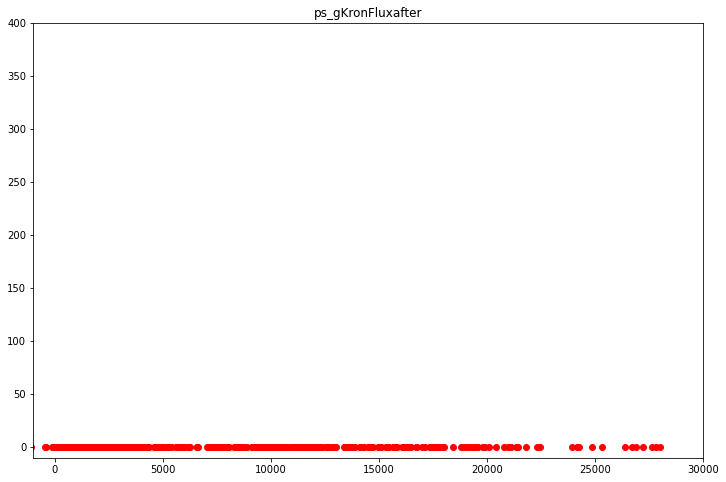

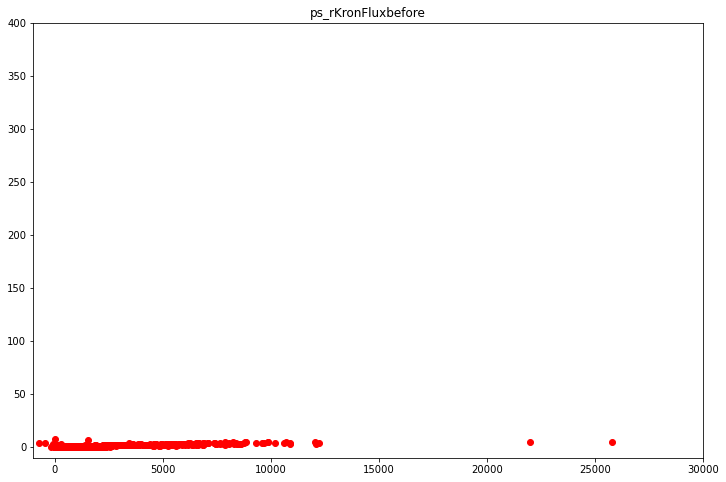

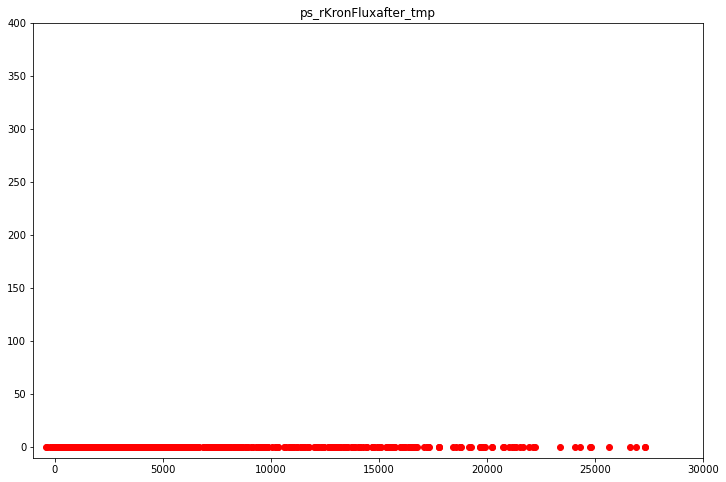

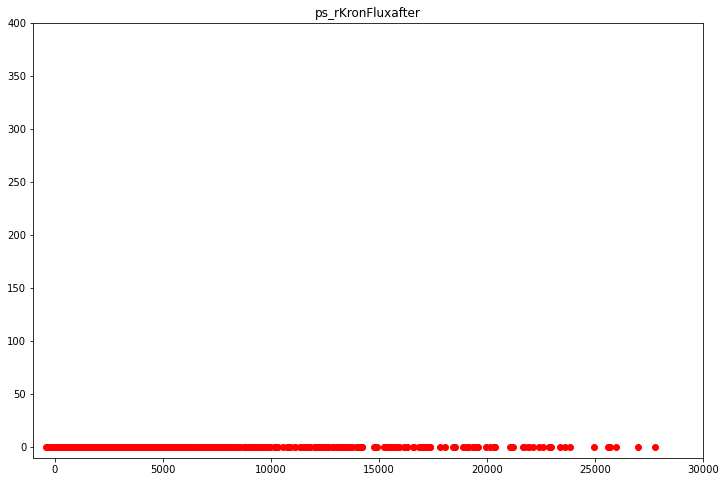

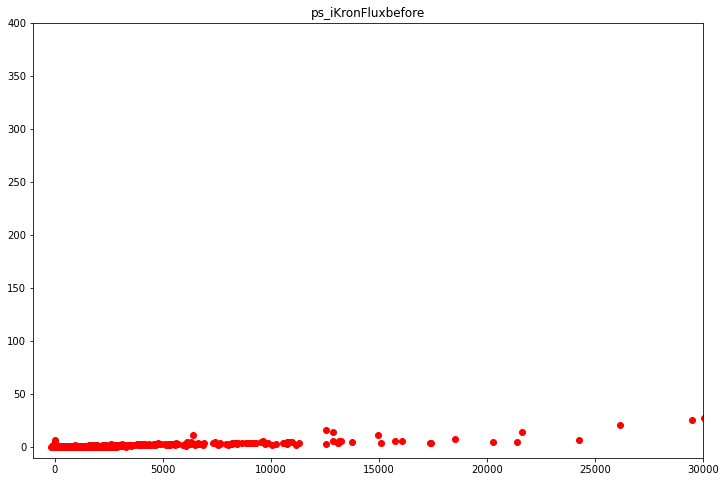

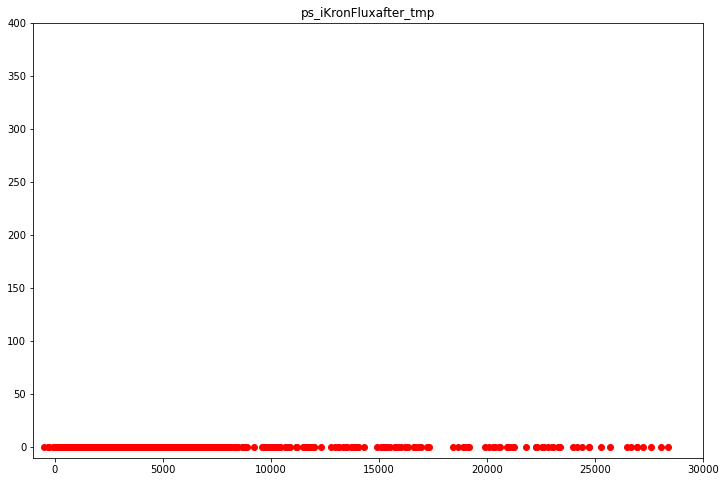

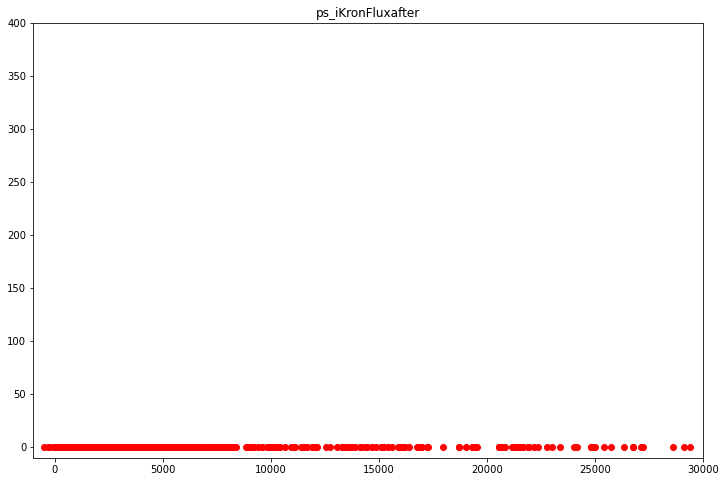

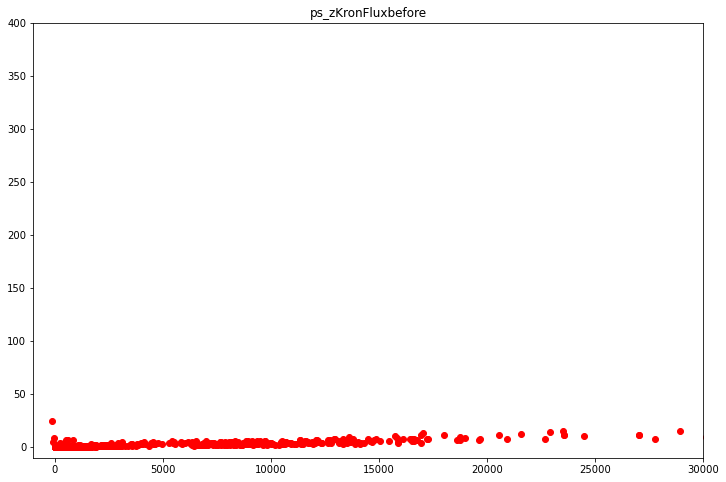

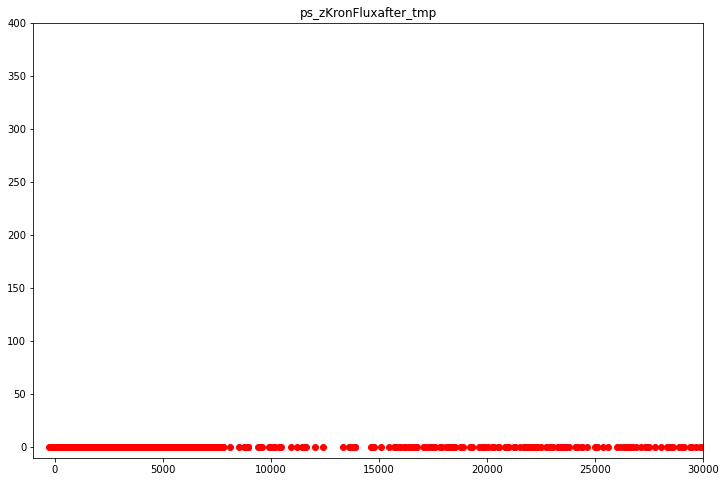

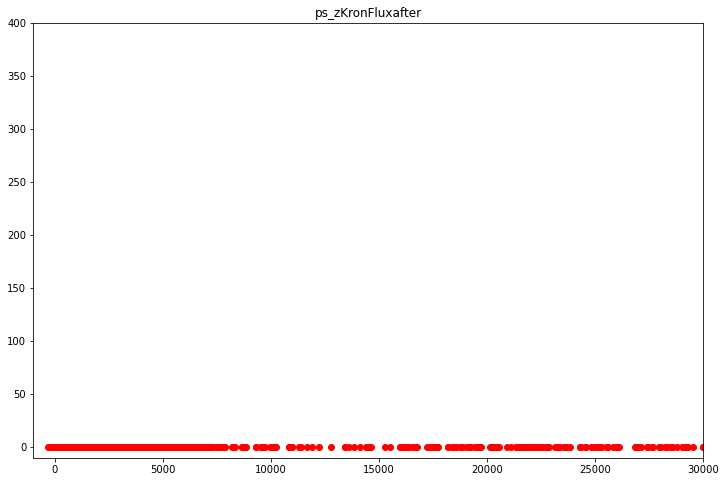

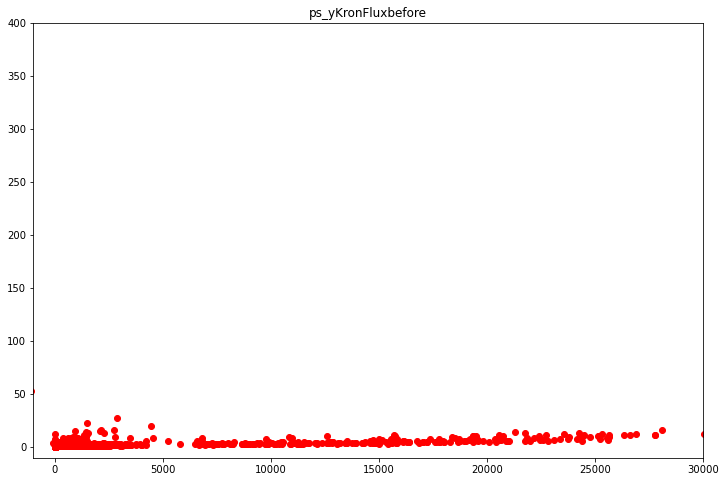

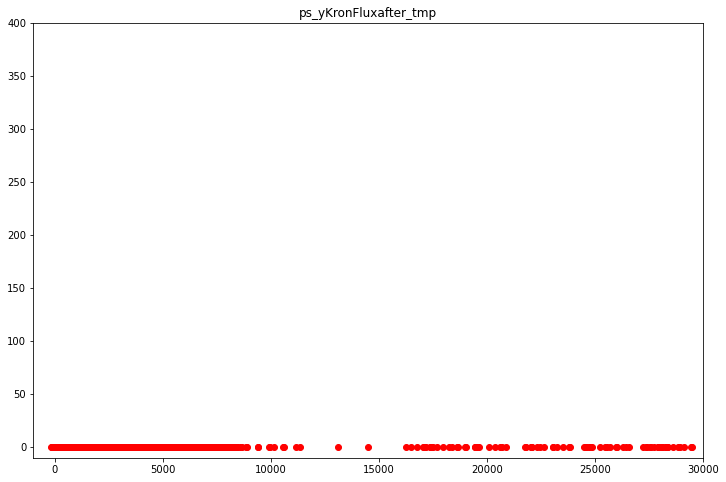

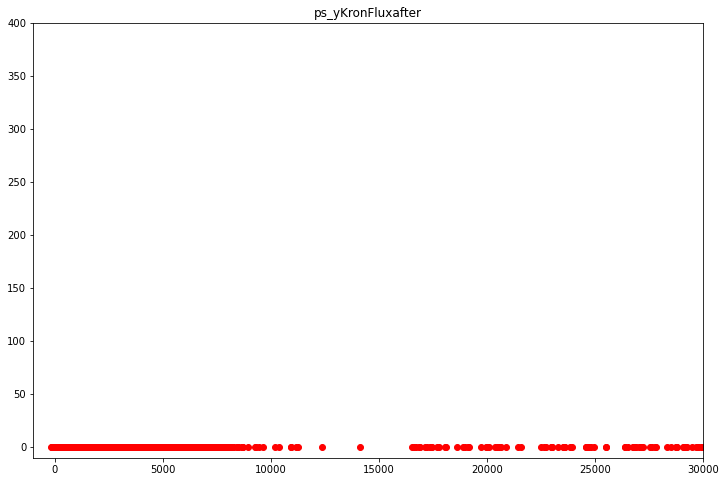

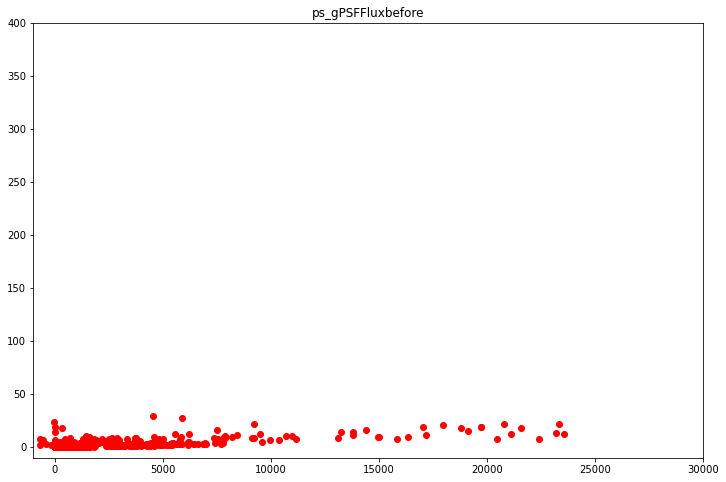

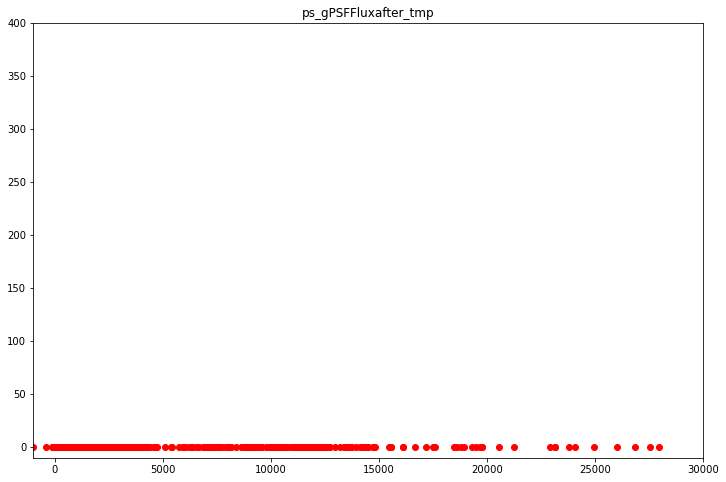

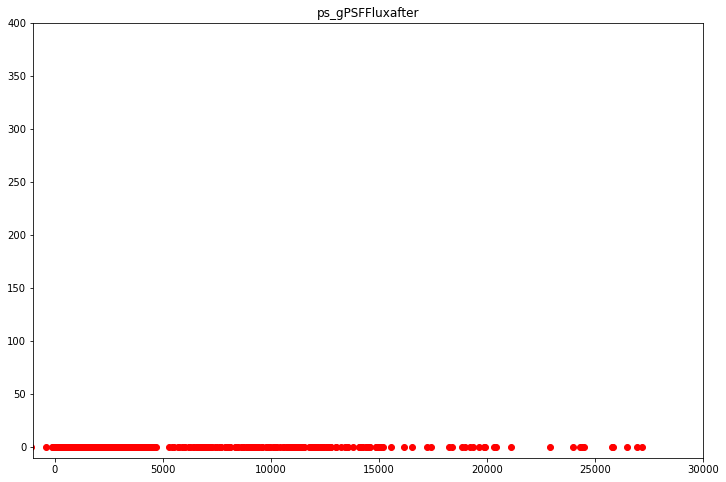

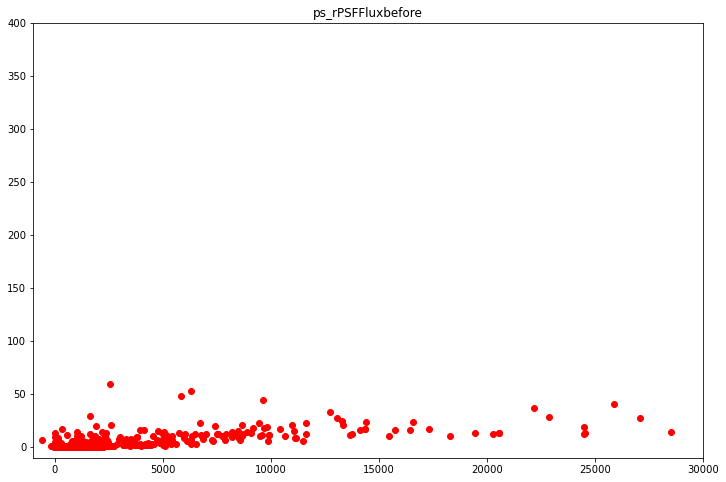

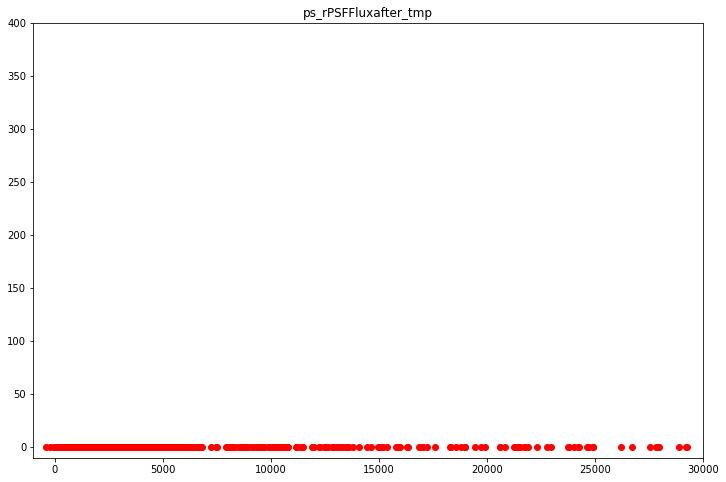

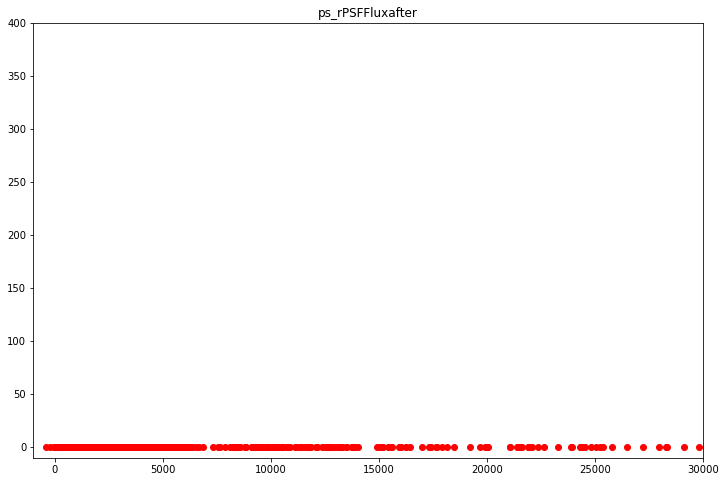

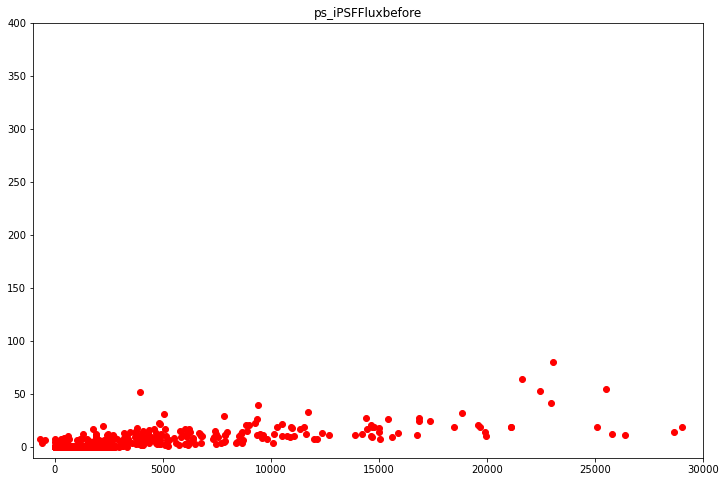

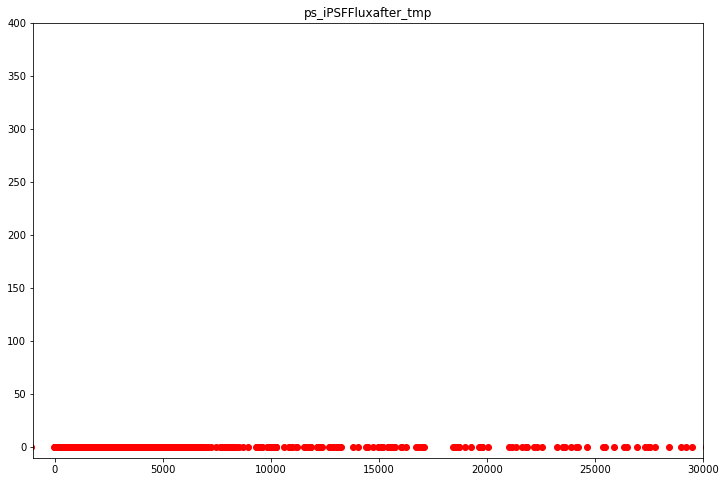

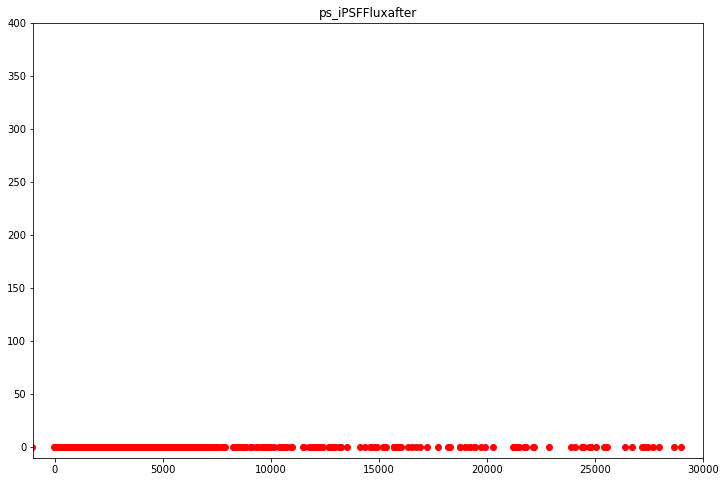

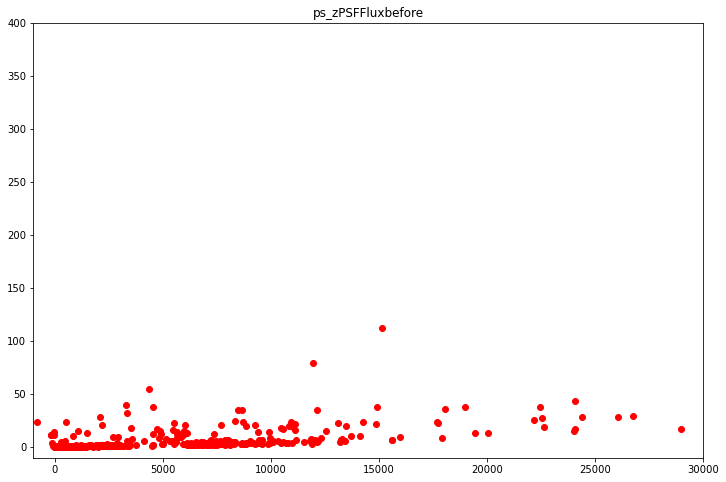

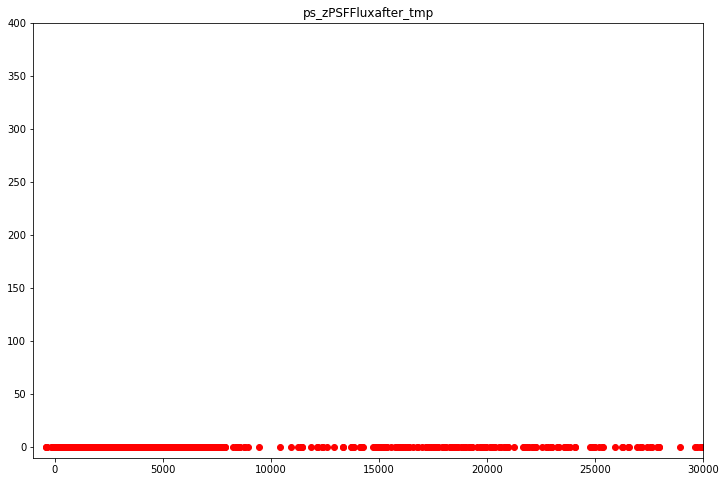

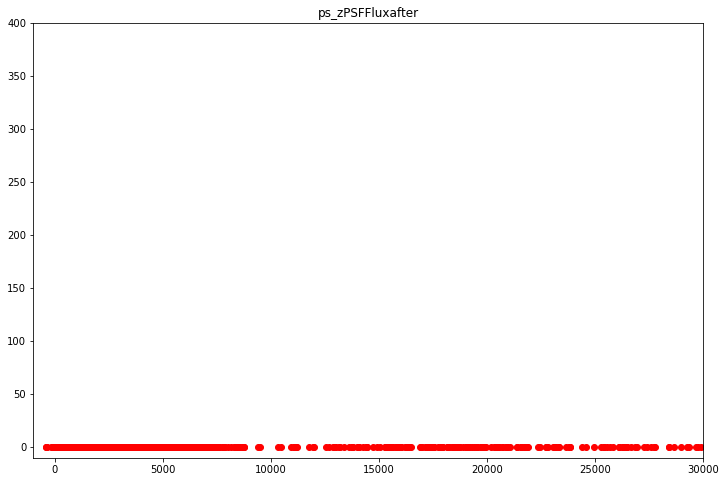

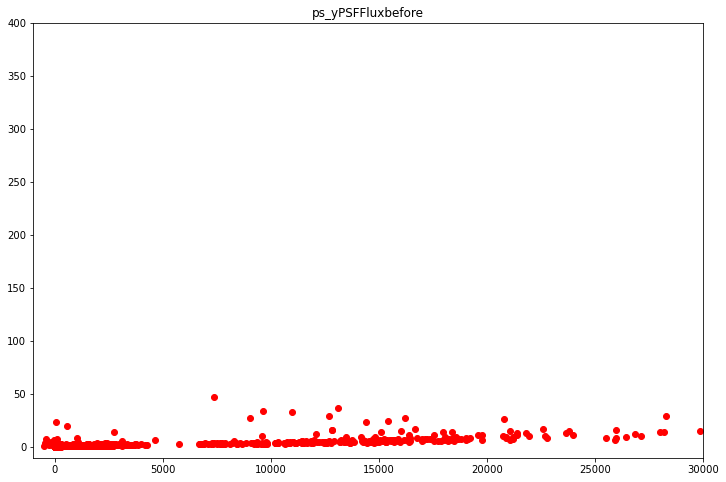

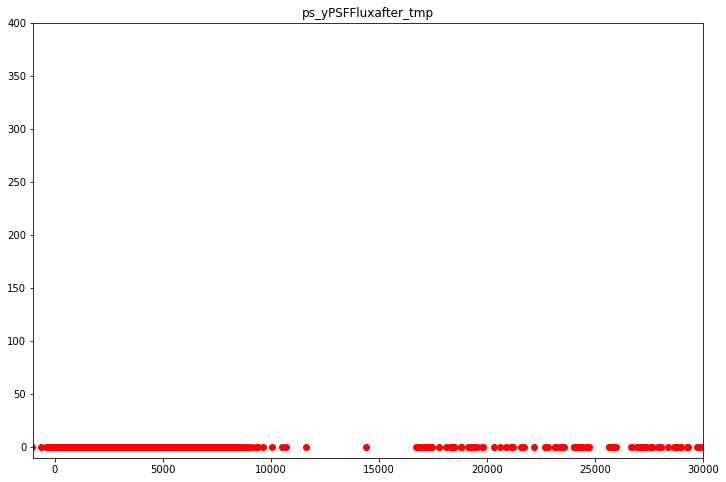

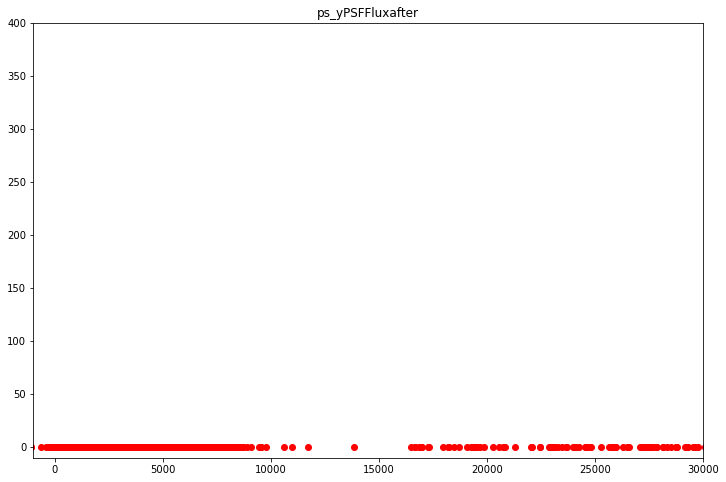

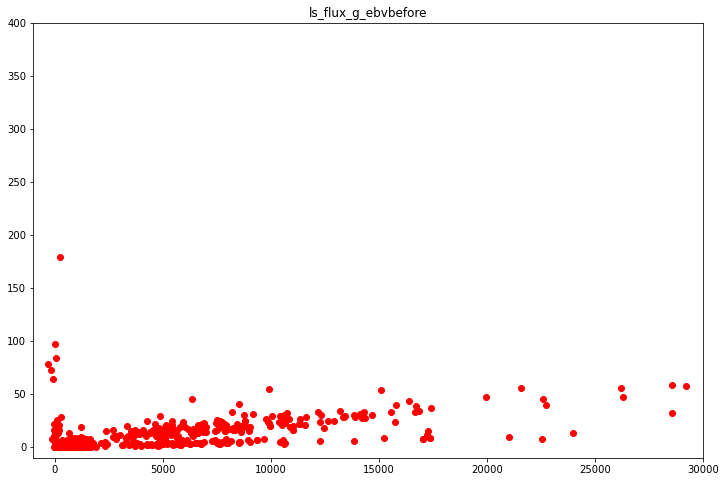

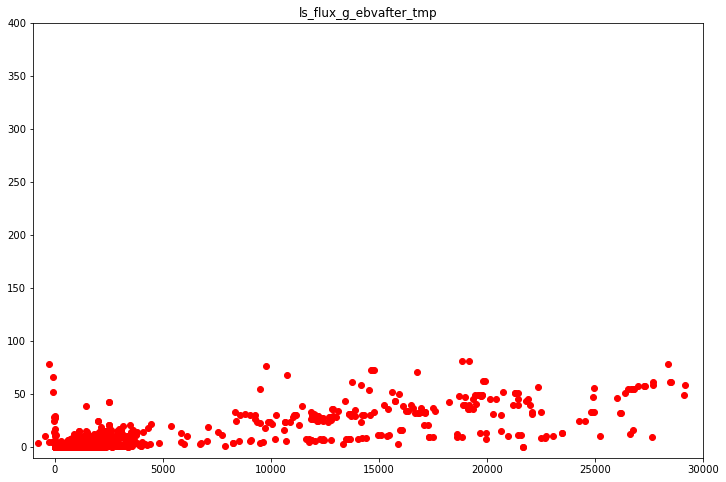

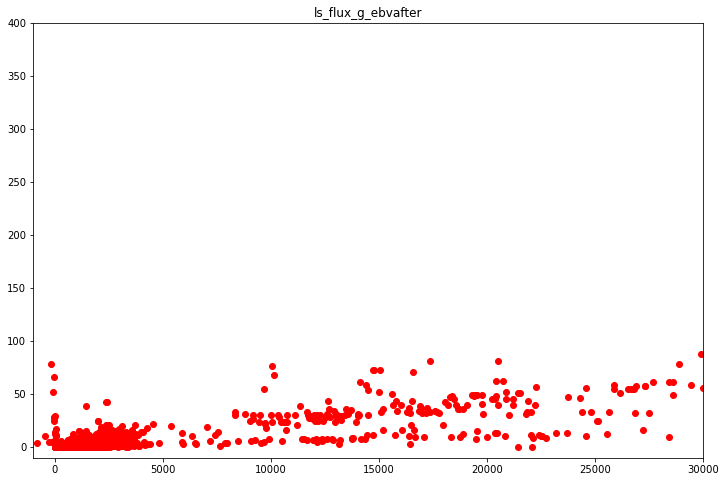

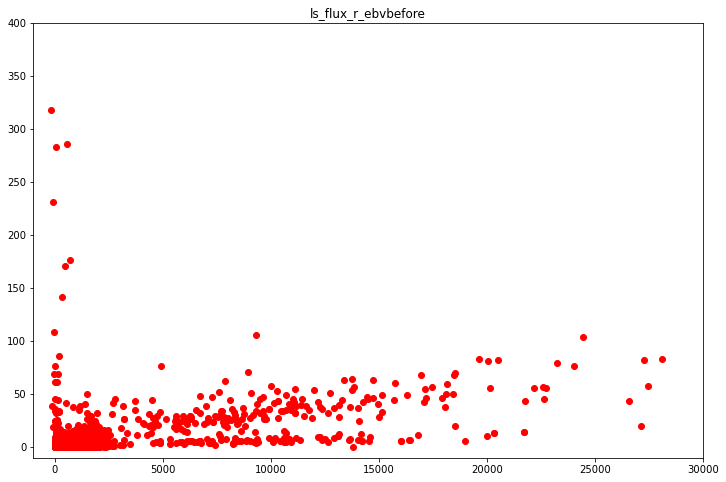

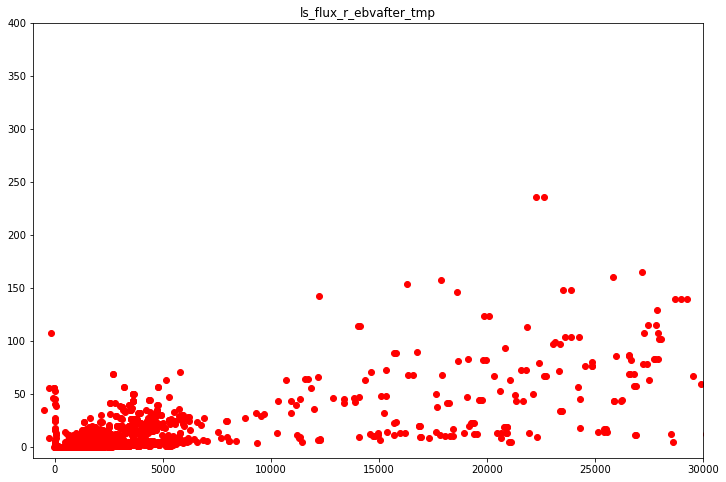

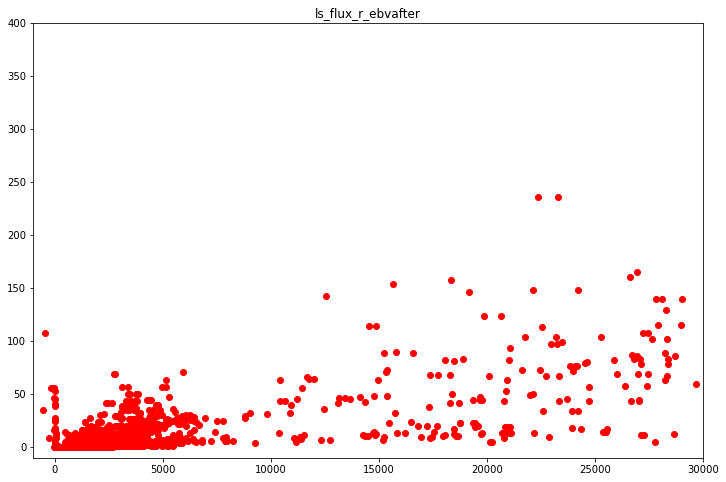

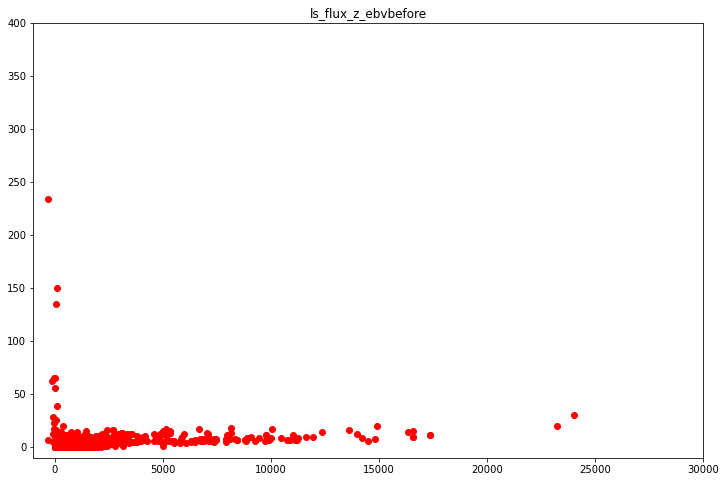

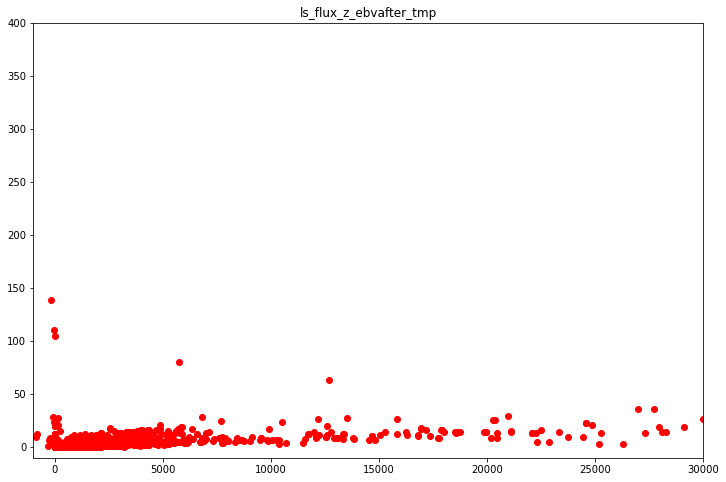

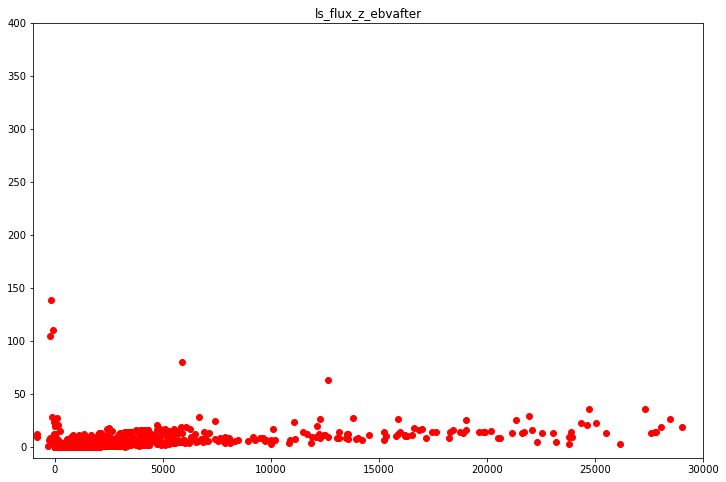

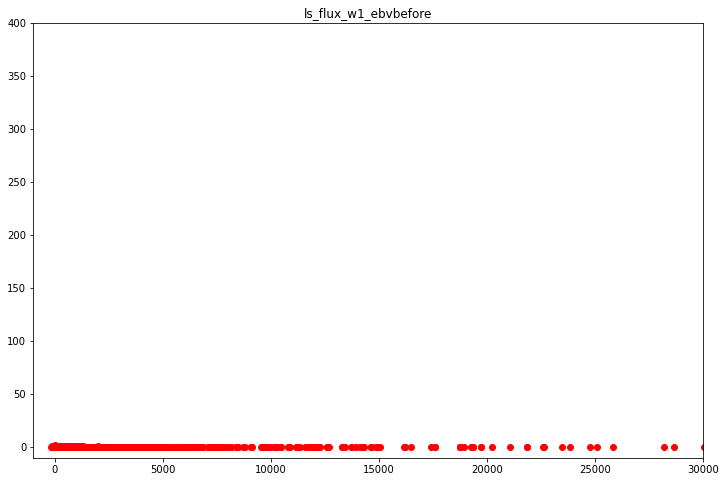

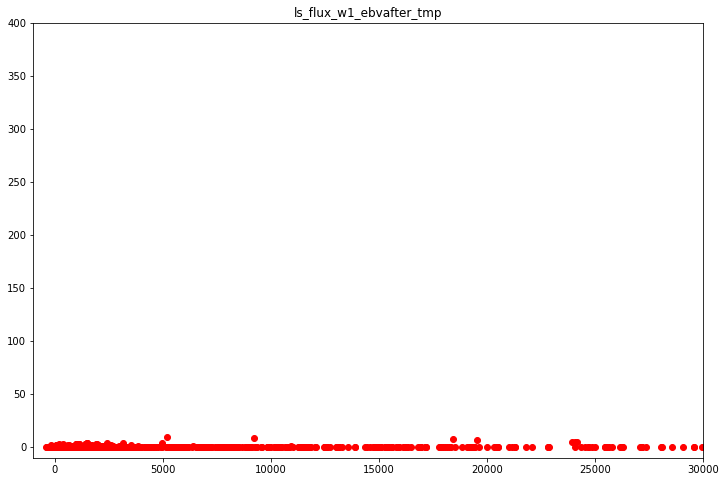

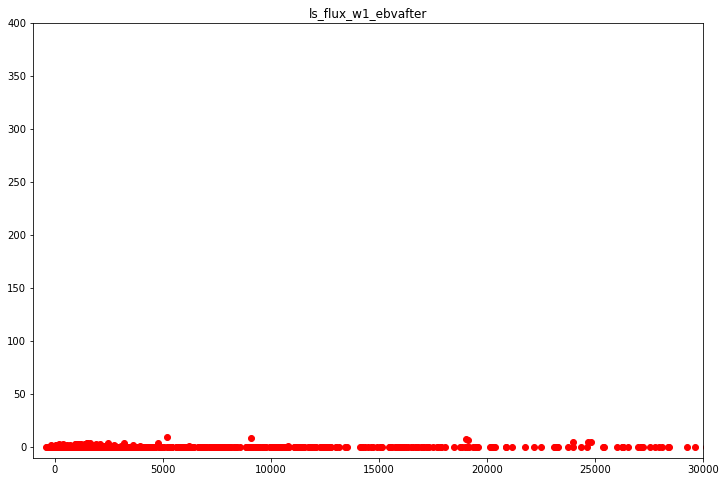

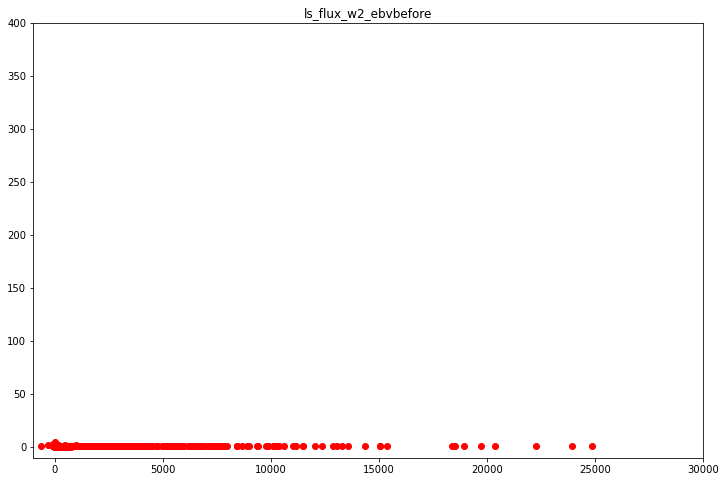

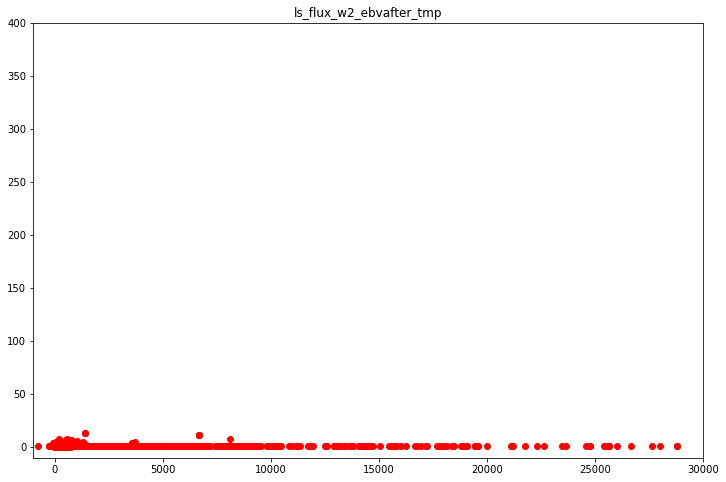

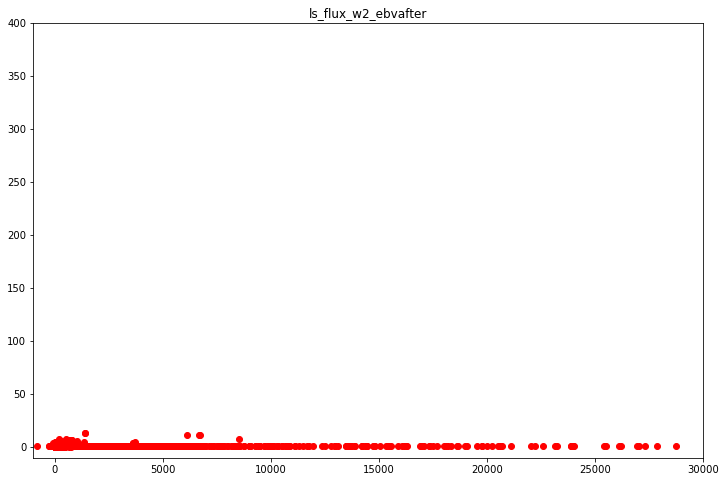

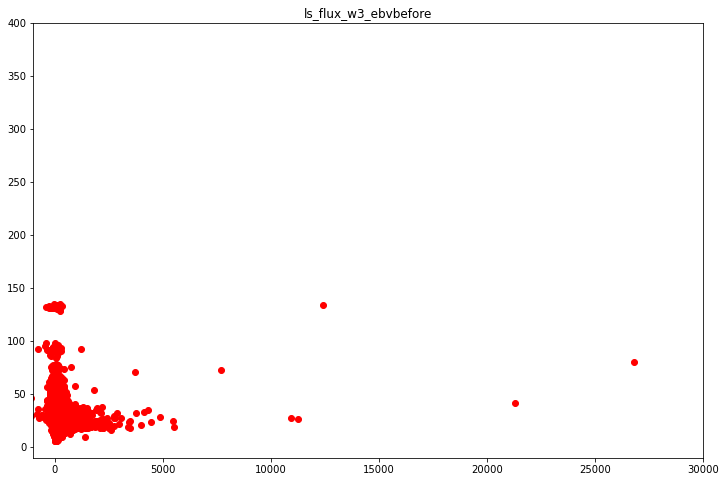

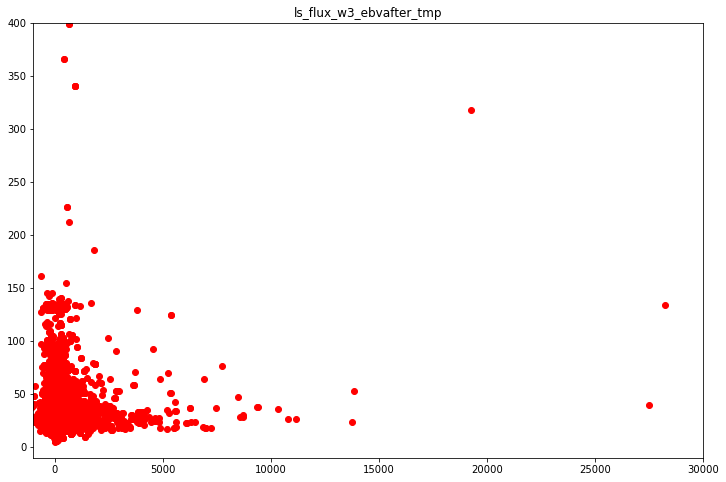

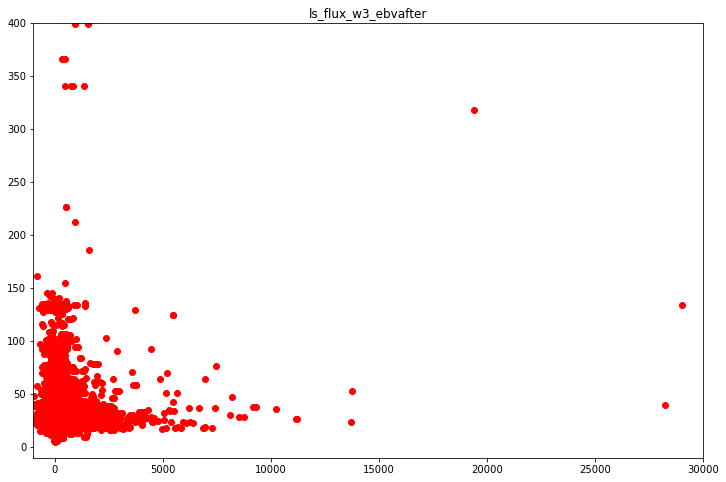

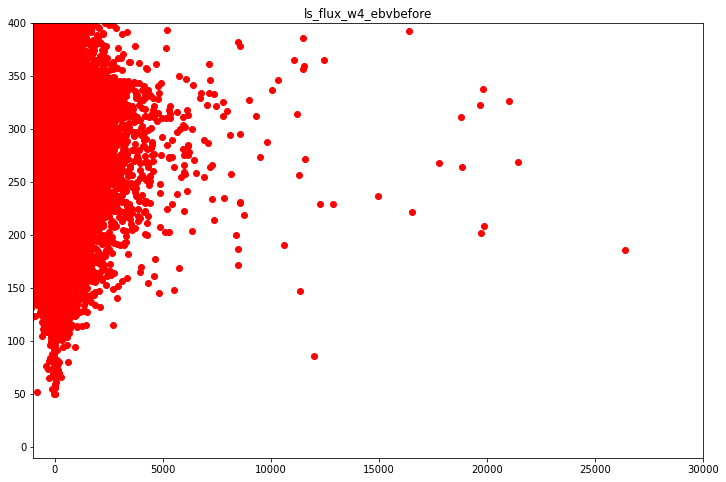

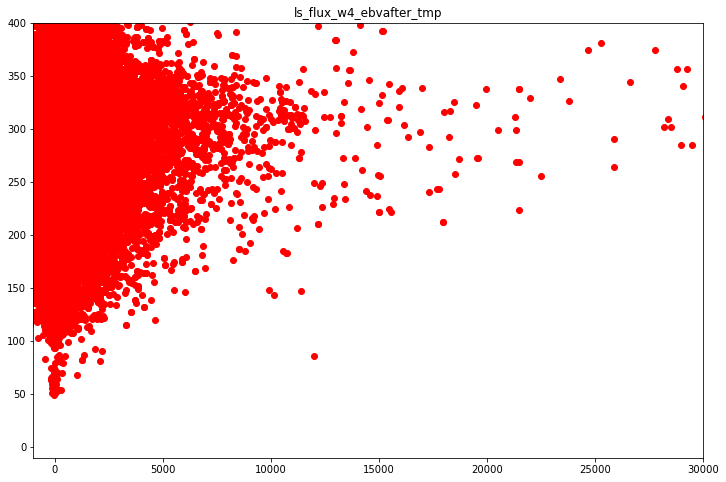

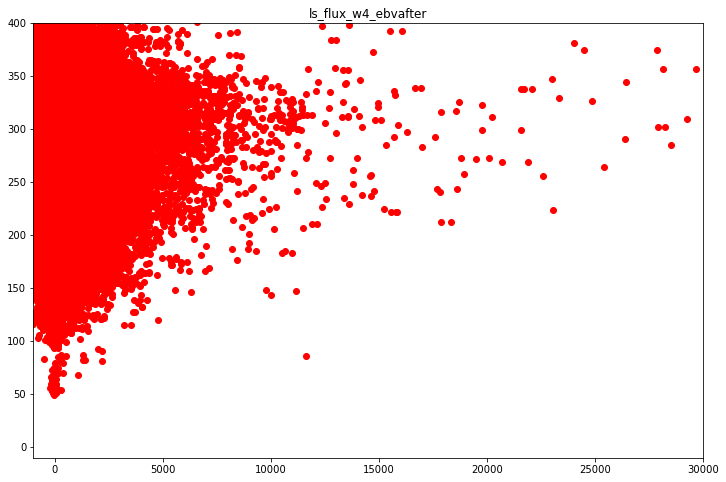

In [13]:
df2 = calculate_features_on_full_catalog(df_after_transform, ebv_accounting=False, augmentation=True, dms=1)

In [27]:
catalog.prepare_features(augmentation=True)

{'sdss': './output_augm/__buf__/augmentation.sdss_fluxes.fits',
 'ps': './output_augm/__buf__/augmentation.ps_fluxes.fits',
 'ls': './output_augm/__buf__/augmentation.ls_fluxes.fits',
 'gaiaedr3': './output_augm/__buf__/augmentation.gaiaedr3_fluxes.fits'}

In [29]:
!ls ./output_augm/__buf__

augmentation.gaiaedr3_fluxes.fits
augmentation.gaiaedr3_fluxes.stderr.20220214062607.txt
augmentation.gaiaedr3_fluxes.stdout.20220214062607.txt
augmentation.ls_fluxes.fits
augmentation.ls_fluxes.stderr.20220213233215.txt
augmentation.ls_fluxes.stdout.20220213233215.txt
augmentation.ps_fluxes.fits
augmentation.ps_fluxes.stderr.20220213164136.txt
augmentation.ps_fluxes.stdout.20220213164136.txt
augmentation.sdss_fluxes.fits
augmentation.sdss_fluxes.stderr.20220213190516.txt
augmentation.sdss_fluxes.stdout.20220213190516.txt
cross-match_base_catalog_coords.fits
cross-match_x-ray_coords.fits


Что получили после аугментации:

In [10]:
df_aug = pd.read_pickle('./output_augm/augmentation.features.gz_pkl', compression='gzip')
df2 = pd.read_pickle('./output_augm/augmentation2.features.gz_pkl', compression='gzip')
# df_aug = df_aug.merge(df[['ra', 'dec', 'nrow', 'objID', 'class']], how='left', on=['ra', 'dec', 'nrow', 'objID'])
# df2.to_pickle('./output_augm/augmentation2.features.gz_pkl', compression='gzip')
# df_aug = pd.read_pickle('./output_augm/augmentation_class.features.gz_pkl', compression='gzip')
df_aug

,ra,dec,nrow,objID,__workxid__,ps_sep_input,ps_objID,ps_raBest,ps_decBest,ps_raStack,...,phot_is_train_star,phot_is_train_gal,phot_is_test_xxln_m16,phot_is_test_s82x_l19,phot_is_test_s82x_a17,phot_is_test_qso,phot_is_test_star,phot_is_test_gal,phot_is_spec_sdss,phot_test_field
0,219.005907,19.948889,198482,131932190057259165,0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,-
1,130.411915,9.373807,368943,119241304119489055,1,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,-
2,170.455790,19.878579,610236,131851704557834825,2,0.052266,131851704557834825,170.455785,19.878565,171.799337,...,False,False,False,False,False,False,False,False,False,-
3,167.602380,4.826100,692755,113791676021961937,3,0.820555,113791676021961937,167.602196,4.826236,166.850227,...,False,False,False,False,False,False,False,False,False,-
4,204.828265,53.694016,52943,172432048282463503,4,0.099468,172432048282463503,204.828221,53.694026,204.828221,...,False,False,False,False,False,False,False,False,False,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84124,6.372177,1.363077,960263,1237678617420628015,84093,0.119310,109630063721716185,6.372177,1.363110,5.521615,...,False,False,False,False,False,False,False,False,False,S82X
84125,167.748040,50.564964,960285,1237657628450750810,84094,0.256413,168671677481188566,167.748075,50.564896,167.748078,...,False,False,False,False,False,False,False,False,False,-
84126,251.800550,50.801796,960307,1237665583253881608,84095,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,-
84127,22.535753,30.106945,960326,1237679579471282689,84096,0.084500,144120225357308887,22.535726,30.106945,22.667167,...,False,False,False,False,False,False,False,False,False,-


Имеем две таблицы, для которых необходимо сделать предсказание \
Воспользуемся для этого готовой функцией ```predict```

In [15]:
predict(datasets_files=['./output_augm/after_transform.features.gz_pkl'],
        modelsIds=[18, 19, 20, 21, 22, 35], modelsSeries='x1', njobs=24)
# Я сделала ее автономной, чтобы можно было с минимальным подбором аргументов получить предсказание

kwargs in predict ['./output_augm/after_transform.features.gz_pkl'] [18, 19, 20, 21, 22, 35] x1 None False False 10 <function <lambda> at 0x7f90894b24d0>
===== Not found PZPH1_DATA_PATH env variable. Using default path: /data/SRGz/pzph1/ =====
{'path': '/data/SRGz/pzph1/models/x1', 'models': {'18': 'sdssdr16+wise_deacls8tr_QSO+GALAXY_20201212141009', '19': 'psdr2+wise_deacls8tr_QSO+GALAXY_20201212135046', '20': 'sdssdr16+all_deacls8tr_QSO+GALAXY_20201212143658', '21': 'psdr2+all_deacls8tr_QSO+GALAXY_20201212142333', '22': 'deacls8tr_QSO+GALAXY_20201212135641', '34': 'sdssdr16+psdr2+wise_deacls8tr_QSO+GALAXY_20201212131454', '35': 'sdssdr16+psdr2+all_deacls8tr_QSO+GALAXY_20201212133711'}, 'config': {'perturb': 8, 'ebv_accounting': True}}
===== Use WISE forced =  ===== False or False
HHHHHEEEEEEEYYYYYYY


Predictions:   0%|          | 0/1 [00:00<?, ?it/s]

./output_augm/after_transform.pdfs.x118.gz_pkl
./output_augm/after_transform.pdfs.x119.gz_pkl
./output_augm/after_transform.pdfs.x120.gz_pkl
./output_augm/after_transform.pdfs.x121.gz_pkl
./output_augm/after_transform.pdfs.x122.gz_pkl
./output_augm/after_transform.pdfs.x135.gz_pkl



Predictions: 100%|██████████| 1/1 [00:10<00:00, 10.97s/it]


In [4]:
predict(datasets_files=['./output_augm/augmentation2.features.gz_pkl'],
        modelsIds=[18, 19, 20, 21, 22, 35], modelsSeries='x1', njobs=10)
# Я сделала ее автономной, чтобы можно было с минимальным подбором аргументов получить предсказание

kwargs in predict ['./output_augm/augmentation2.features.gz_pkl'] [18, 19, 20, 21, 22, 35] x1 None False False 10 <function <lambda> at 0x7fb128dc1320>
===== Not found PZPH1_DATA_PATH env variable. Using default path: /data/SRGz/pzph1/ =====
{'path': '/data/SRGz/pzph1/models/x1', 'models': {'18': 'sdssdr16+wise_deacls8tr_QSO+GALAXY_20201212141009', '19': 'psdr2+wise_deacls8tr_QSO+GALAXY_20201212135046', '20': 'sdssdr16+all_deacls8tr_QSO+GALAXY_20201212143658', '21': 'psdr2+all_deacls8tr_QSO+GALAXY_20201212142333', '22': 'deacls8tr_QSO+GALAXY_20201212135641', '34': 'sdssdr16+psdr2+wise_deacls8tr_QSO+GALAXY_20201212131454', '35': 'sdssdr16+psdr2+all_deacls8tr_QSO+GALAXY_20201212133711'}, 'config': {'perturb': 8, 'ebv_accounting': True}}
===== Use WISE forced =  ===== False or False
HHHHHEEEEEEEYYYYYYY


Predictions:   0%|          | 0/1 [00:00<?, ?it/s]

./output_augm/augmentation2.pdfs.x118.gz_pkl
./output_augm/augmentation2.pdfs.x119.gz_pkl
./output_augm/augmentation2.pdfs.x120.gz_pkl
./output_augm/augmentation2.pdfs.x121.gz_pkl
./output_augm/augmentation2.pdfs.x122.gz_pkl
./output_augm/augmentation2.pdfs.x135.gz_pkl



  0%|          | 0/6 [00:00<?, ?it/s]/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.22.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.22.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


2        0
2        1
2        2
2        3
2        4
        ..
84128    4
84128    5
84128    6
84128    7
84128    8
Name: __perturbed__, Length: 628371, dtype: int64
69819
[0.1242268  3.562      0.06854565 ... 3.198      2.85       3.543     ] <class 'numpy.ndarray'> <class 'numpy.float64'>
(69819,) 0
(69819,) 1
(69819,) 2
(69819,) 3
(69819,) 4
(69819,) 5
(69819,) 6
(69819,) 7
(69819,) 8
(69819,) 0
(69819,) 1
(69819,) 2
(69819,) 3
(69819,) 4
(69819,) 5
(69819,) 6
(69819,) 7
(69819,) 8
(69819,) 0
(69819,) 1
(69819,) 2
(69819,) 3
(69819,) 4
(69819,) 5
(69819,) 6
(69819,) 7
(69819,) 8
(69819,) 0
(69819,) 1
(69819,) 2
(69819,) 3
(69819,) 4
(69819,) 5
(69819,) 6
(69819,) 7
(69819,) 8
(69819,) 0
(69819,) 1
(69819,) 2
(69819,) 3
(69819,) 4
(69819,) 5
(69819,) 6
(69819,) 7
(69819,) 8
(69819,) 0
(69819,) 1
(69819,) 2
(69819,) 3
(69819,) 4
(69819,) 5
(69819,) 6
(69819,) 7
(69819,) 8
(69819,) 0
(69819,) 1
(69819,) 2
(69819,) 3
(69819,) 4
(69819,) 5
(69819,) 6
(69819,) 7
(69819,) 8
(69819,) 0

  0%|          | 0/69819 [00:00<?, ?it/s]


Predictions: 100%|██████████| 1/1 [12:04<00:00, 724.92s/it]


Что появилось в папках?

In [5]:
!ls ./output_augm

after_transform.dp.cf.gz_pkl	   augmentation2.pdfs.x118.gz_pkl
after_transform.features.gz_pkl    augmentation2.pdfs.x119.gz_pkl
after_transform.pdfs.x118.gz_pkl   augmentation2.pdfs.x120.gz_pkl
after_transform.pdfs.x119.gz_pkl   augmentation2.pdfs.x121.gz_pkl
after_transform.pdfs.x120.gz_pkl   augmentation2.pdfs.x122.gz_pkl
after_transform.pdfs.x121.gz_pkl   augmentation2.pdfs.x135.gz_pkl
after_transform.pdfs.x122.gz_pkl   augmentation2.preds.x118.gz_pkl
after_transform.pdfs.x135.gz_pkl   augmentation2.preds.x119.gz_pkl
after_transform.preds.x118.gz_pkl  augmentation2.preds.x120.gz_pkl
after_transform.preds.x119.gz_pkl  augmentation2.preds.x121.gz_pkl
after_transform.preds.x120.gz_pkl  augmentation2.preds.x122.gz_pkl
after_transform.preds.x121.gz_pkl  augmentation2.preds.x135.gz_pkl
after_transform.preds.x122.gz_pkl  augmentation.dp.cf.gz_pkl
after_transform.preds.x135.gz_pkl  augmentation.features.gz_pkl
augmentation2.dp.cf.gz_pkl	   augmentation.pdfs.x118.gz_pkl
augmentation2.featur

Заметим, что это не последний этап предсказания, так как необходимо обработать результат и записать его в отдельную таблицу \
Это делается с помощью Витиной функции ```assemble_and_analyze_results```

In [15]:
!mkdir ./output_augm/preds

In [16]:
assemble_and_analyze_results('./output_augm', './output_augm/preds', models_series='x1', file_name='after_transform')

In [17]:
assemble_and_analyze_results('./output_augm', './output_augm/preds', models_series='x1', file_name='augmentation2')

In [58]:
fname = 'augmentation2'
df_augm2 = pd.concat(
    [
        pd.read_pickle(f'./output_augm/{fname}.features.gz_pkl', compression='gzip'),
        pd.read_pickle(f'./output_augm/preds/{fname}.best.x1.gz_pkl', compression='gzip')
    ],
    axis=1
).merge(
            df[['ra', 'dec', 'nrow', 'objID', 'class']],
            how='left', on=['ra', 'dec', 'nrow', 'objID']
        )
df_augm2['zoo_best-x1_z_max']

0             NaN
1             NaN
2        2.578961
3             NaN
4        0.147853
           ...   
84124       0.688
84125    3.035842
84126         NaN
84127    3.339368
84128    3.428326
Name: zoo_best-x1_z_max, Length: 84129, dtype: object

In [59]:
fname = 'after_transform'
df_after = pd.concat(
    [
        pd.read_pickle(f'./output_augm/{fname}.features.gz_pkl', compression='gzip'),
        pd.read_pickle(f'./output_augm/preds/{fname}.best.x1.gz_pkl', compression='gzip')
    ],
    axis=1
).merge(
            df[['ra', 'dec', 'nrow', 'objID', 'class']],
            how='left', on=['ra', 'dec', 'nrow', 'objID']
        )

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls

%matplotlib inline

In [70]:
def plotishe(df, x, y):
    CLASS = {1:'STAR and GALAXY', 2:'QSO'}
    f, axes = plt.subplots(ncols = 2, figsize=(15, 5), sharex=True, sharey = True)
    for cls in CLASS.keys():
        p = df.loc[df['class'] == cls]
        norm = colors.Normalize(vmin=np.min(p['zoo_best-x1_z_maxConf']), vmax=np.max(p['zoo_best-x1_z_maxConf']))
        axes[cls-1].set_title(CLASS[cls])
        axes[cls-1].set_xlabel(x)
        axes[cls-1].set_ylabel(y)
        axes[cls-1].scatter(p[x],p[y], c=p['zoo_best-x1_z_maxConf'], norm=norm)
        axes[cls-1].set_ylim([10, 28])
        axes[cls-1].set_xlim([-0.5, 7])
        
        
    plt.show()

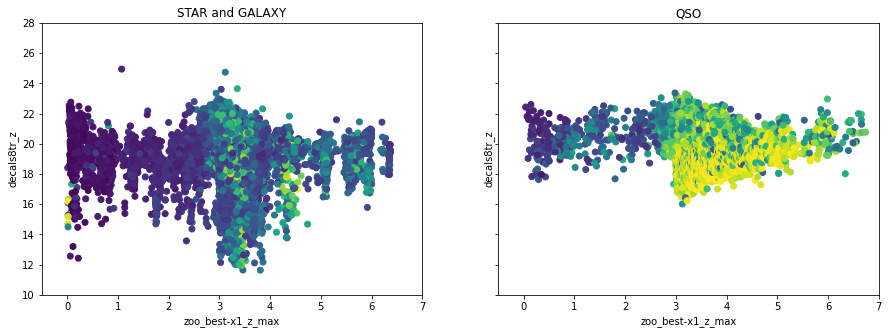

In [71]:
plotishe(df_after, 'zoo_best-x1_z_max', 'decals8tr_z')

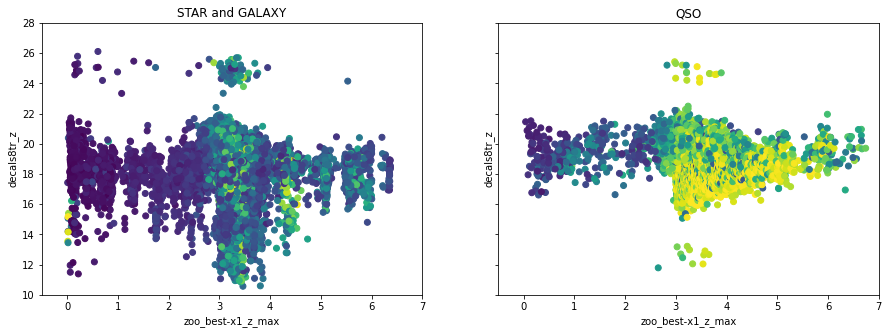

In [72]:
plotishe(df_augm2, 'zoo_best-x1_z_max', 'decals8tr_z')

In [ ]:
def data_augmentation(input_data: str, output_path: str, radec=['ra', 'dec'], dms=[1, -1, -2], njobs=24):
    """
    Full application of data augmentation
    ::input_data  - path to input data
    ::output_path - path to output
    """
    import os
    buf = os.path.join(output_path, 'calculations')
    if not os.path.exists(buf):
        os.makedirs(buf)
        os.makedirs(os.path.join(buf, 'zpred'))
    # Открываем входные данные, получаем все признаки для 
    catalog = Catalog(input_data, ('ra', 'dec'),
                      njobs=njobs, output_dir=buf,
                      filename='before')
    paths_data = [os.path.join(buf, f'before.features.gz_pkl')]
    
    catalog.prepare_data()
    for i, dm in enumerate(dms):
        path = os.path.join(buf, f'augmentation_{i}.features.gz_pkl')
        paths_data.append[path]
        calculate_features_on_full_catalog(
            df_after_transform,
            ebv_accounting=False,
            augmentation=True,
            dms=dm
        ).to_pickle(path, compression='gzip')
    
    predict(datasets_files=paths_data, modelsIds=[18, 19, 20, 21, 22, 35], modelsSeries='x1', njobs=njobs)
    assemble_and_analyze_results(buf, os.path.join(buf, 'zpred'), models_series='x1', file_name='augmentation2')
    